In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/data/cleaned_data_powerco.csv')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2009-08-21   2015-08-31             189.95  ...              0.147600   
2      2010-04-16   2015-04-17              47.96  ...              0.167798   
3      2010-03-30   2015-03-31             240.04  ...              0.148586   
4      2010-01-13   2015-03-09             445.75  ...              0.119906   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.000000              0.000000             44.444710   
2              0.088409              0.000000             44.444710   
3              0.000000              0.000000             44.444710   
4              0.101673              0.073719             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.592310   
2              0.000000              0.000000        44.612508   
3              0.000000              0.000000        44.593296   
4             24.437330             16.291555        40.848791   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.000000          0.000000      0  
2          0.088409          0.000000      0  
3          0.000000          0.000000      0  
4         24.539003         16.365274      0  

[5 rows x 53 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14605 non-null  object 
 1   channel_sales                   14605 non-null  object 
 2   cons_12m                        14605 non-null  int64  
 3   cons_gas_12m                    14605 non-null  int64  
 4   cons_last_month                 14605 non-null  int64  
 5   date_activ                      14605 non-null  object 
 6   date_end                        14605 non-null  object 
 7   date_modif_prod                 14605 non-null  object 
 8   date_renewal                    14605 non-null  object 
 9   forecast_cons_12m               14605 non-null  float64
 10  forecast_cons_year              14605 non-null  int64  
 11  forecast_discount_energy        14605 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
print(df.duplicated().sum())

0


In [5]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [6]:
price_df = pd.read_csv("D:\data\Bcg virtual exp prog\price_data.csv")
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

#### As per the case study one of the colleague has identified a feature which may have high predicitve power. And they have provided with code for the same.

#### Difference between off-peak prices in December and preceding January

In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id','offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [9]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.036909   
1      2009-08-21   2015-08-31             189.95  ...              0.000000   
2      2010-04-16   2015-04-17              47.96  ...              0.000000   
3      2010-03-30   2015-03-31             240.04  ...              0.000000   
4      2010-01-13   2015-03-09             445.75  ...              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_p1  mean_3m_price_p2 mean_3m_price_p3  churn  \
0         42.629663         12.311304         8.182687      1   
1         44.592310          0.000000         0.000000      0   
2         44.612508          0.088409         0.000000      0   
3         44.593296          0.000000         0.000000      0   
4         40.848791         24.539003        16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

### We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [10]:
# Aggregate average prices per period by company

mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [12]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3  \
0      2015-11-01   2015-06-23               0.00  ...          8.182687   
1      2009-08-21   2015-08-31             189.95  ...          0.000000   
2      2010-04-16   2015-04-17              47.96  ...          0.000000   
3      2010-03-30   2015-03-31             240.04  ...          0.000000   
4      2010-01-13   2015-03-09             445.75  ...         16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 61 columns]

In [13]:
df['contract_period'] = df['date_end'] - df['date_activ']
df['days_mod_prod'] = df['date_end'] - df['date_modif_prod']
df['days_renewal'] = df['date_end'] - df['date_renewal']

In [14]:
df['contract_period']

0       1096 days
1       2566 days
2       2192 days
3       2192 days
4       2245 days
           ...   
14600   1445 days
14601   1461 days
14602   1460 days
14603   1461 days
14604   2556 days
Name: contract_period, Length: 14605, dtype: timedelta64[ns]

In [15]:
df['days_mod_prod']

0        227 days
1       2566 days
2       2192 days
3       2192 days
4       2245 days
           ...   
14600    366 days
14601   1461 days
14602   1460 days
14603   1461 days
14604   2556 days
Name: days_mod_prod, Length: 14605, dtype: timedelta64[ns]

In [16]:
df['days_renewal']

0       358 days
1       365 days
2       365 days
3       365 days
4       364 days
          ...   
14600   713 days
14601   365 days
14602   363 days
14603   365 days
14604   362 days
Name: days_renewal, Length: 14605, dtype: timedelta64[ns]

Datetime objects are not useful for prediction, so we have to create new features from the datetime columns that may hold some predictive power.

'contract_period' will be an important feature because the a client who has been an active client of PowerCo for a longer period of time may have more loyalty and is more likely to stay.

'days_mod_prod' - The clients who have recent modification of their product may choose to stay.

'day_renewal' - If the client have renewed the contract then it may show some the engagement levels of the clients, so this factor may influence the churn.


In [17]:
columns_to_drop = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal','id']
data = df.drop(columns=columns_to_drop)
data.head()

channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_power  \
0                    0.098142  ...                        3.700961   
1                    0.000000  ...                        0.177779   
2                    0.087899  ...                        0.177779   
3                    0.000000  ...                        0.177779   
4                    0.100015  ...                        0.162916   

  off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                    0.024038                     0.034219   
1                    0.142485                     0.007124   
2                    0.082090                     0.088421   
3                    0.151210                     0.000000   
4                    0.020536                     0.030773   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   contract_period days_mod_prod  days_renewal  
0        1096 days      227 days      358 days  
1        2566 days     2566 days      365 days  
2        2192 days     2192 days      365 days  
3        2192 days     2192 days      365 days  
4        2245 days     2245 days      364 days  

[5 rows x 59 columns]

In [18]:
data['contract_period'] = data['contract_period'].dt.days.astype(int)
data['days_mod_prod'] = data['days_mod_prod'].dt.days.astype(int)
data['days_renewal'] = data['days_renewal'].dt.days.astype(int)

In [19]:
data.head()

channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_power  \
0                    0.098142  ...                        3.700961   
1                    0.000000  ...                        0.177779   
2                    0.087899  ...                        0.177779   
3                    0.000000  ...                        0.177779   
4                    0.100015  ...                        0.162916   

  off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                    0.024038                     0.034219   
1                    0.142485                     0.007124   
2                    0.082090                     0.088421   
3                    0.151210                     0.000000   
4                    0.020536                     0.030773   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   contract_period days_mod_prod  days_renewal  
0             1096           227           358  
1             2566          2566           365  
2             2192          2192           365  
3             2192          2192           365  
4             2245          2245           364  

[5 rows x 59 columns]

### Variable tranformation

From our EDA we identified that in the sales channel - sddiedcslfslkckwlfkdpoeeailfpeds, epumfxlbckeskwekxbiuasklxalciiuu,       
fixdbufsefwooaasfcxdxadsiekoceaa have very low count so this may not have predictive power.       

In [20]:
data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [21]:
data = pd.get_dummies(data, columns=['channel_sales'], prefix='channel')
data = data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ... peak_mid_peak_fix_mean_diff  \
0                    40.606701  ...                    7.450670   
1                    44.311378  ...                    0.000000   
2                    44.311378  ...                    0.000000   
3                    44.311378  ...                    0.000000   
4                    40.606701  ...                    8.137629   

   off_peak_mid_peak_fix_mean_diff  contract_period  days_mod_prod  \
0                        26.040925             1096            227   
1                        44.311375             2566           2566   
2                        44.385450             2192           2192   
3                        44.400265             2192           2192   
4                        24.412893             2245           2245   

   days_renewal  channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0           358                0                                         0   
1           365                1                                         0   
2           365                0                                         0   
3           365                0                                         0   
4           364                1                                         0   

  channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                        1   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 63 columns]

In [22]:
data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [23]:
data = pd.get_dummies(data, columns=['origin_up'], prefix='origin_up')
data = data.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ... days_mod_prod  days_renewal  \
0                    40.606701  ...           227           358   
1                    44.311378  ...          2566           365   
2                    44.311378  ...          2192           365   
3                    44.311378  ...          2192           365   
4                    40.606701  ...          2245           364   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 65 columns]

In [24]:
data['has_gas'] = data['has_gas'].map({"t" : "1","f": "0"})
data['has_gas'].value_counts()

0    11955
1     2650
Name: has_gas, dtype: int64

In [25]:
data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ... days_mod_prod  days_renewal  \
0                    40.606701  ...           227           358   
1                    44.311378  ...          2566           365   
2                    44.311378  ...          2192           365   
3                    44.311378  ...          2192           365   
4                    40.606701  ...          2245           364   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 65 columns]

### Outliers treatment

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    14605 non-null  int64  
 1   cons_gas_12m                                14605 non-null  int64  
 2   cons_last_month                             14605 non-null  int64  
 3   forecast_cons_12m                           14605 non-null  float64
 4   forecast_cons_year                          14605 non-null  int64  
 5   forecast_discount_energy                    14605 non-null  float64
 6   forecast_meter_rent_12m                     14605 non-null  float64
 7   forecast_price_energy_off_peak              14605 non-null  float64
 8   forecast_price_energy_peak                  14605 non-null  float64
 9   forecast_price_pow_off_peak                 14605 non-null  float64
 10  has_gas   

In [27]:
data['has_gas'] = data['has_gas'].astype(int)

In [28]:
categorical_cols = data[['has_gas','churn','channel_MISSING',
                         'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
                         'channel_foosdfpfkusacimwkcsosbicdxkicaua',
                         'channel_lmkebamcaaclubfxadlmueccxoimlema',
                         'channel_usilxuppasemubllopkaafesmlibmsdf',
                         'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
                         'origin_up_ldkssxwpmemidmecebumciepifcamkci',
                         'origin_up_lxidpiddsbxsbosboudacockeimpuepw']]

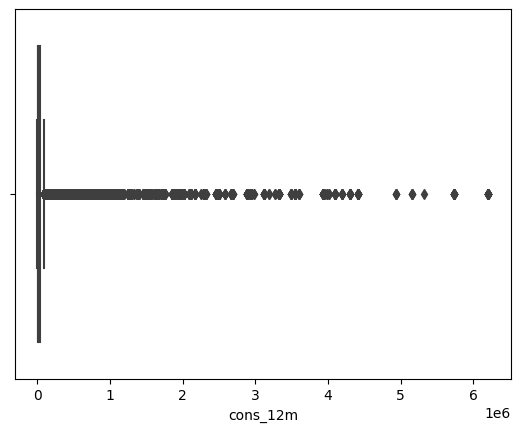

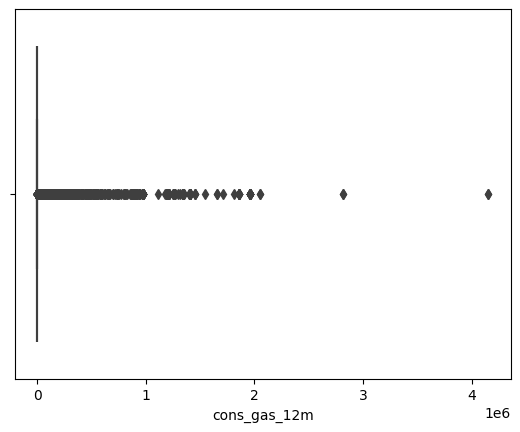

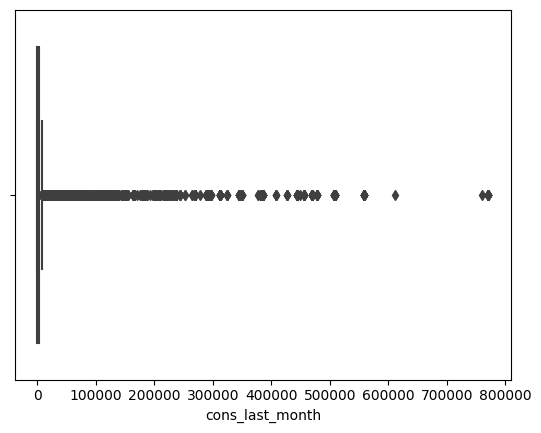

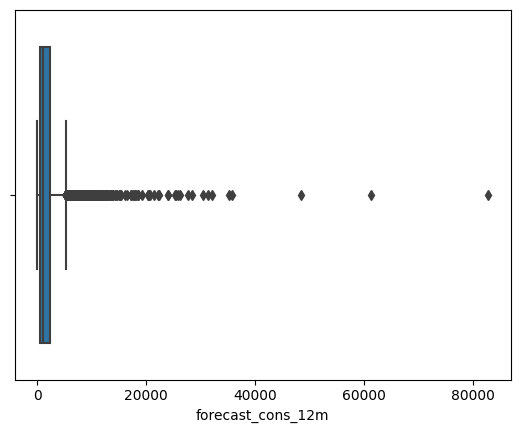

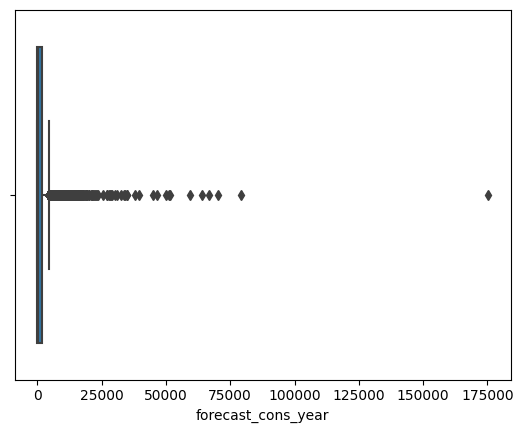

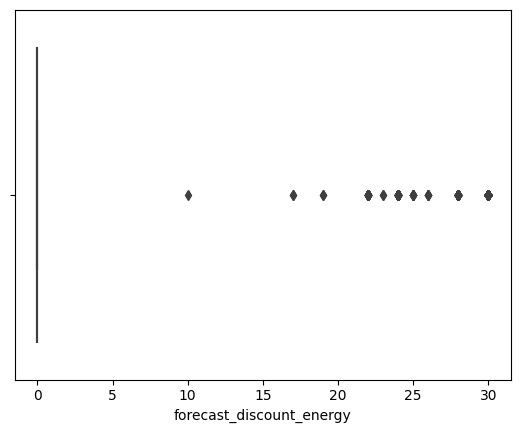

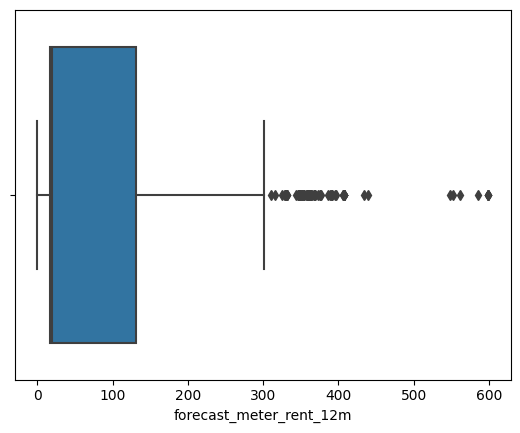

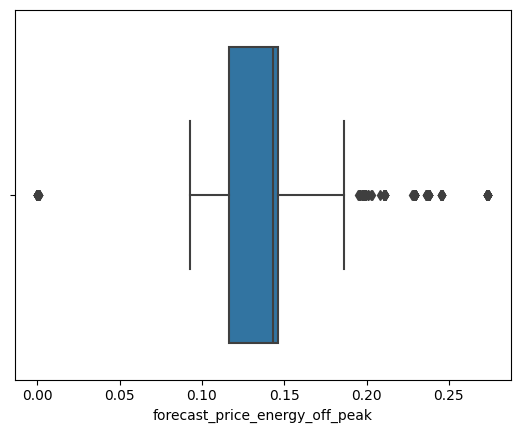

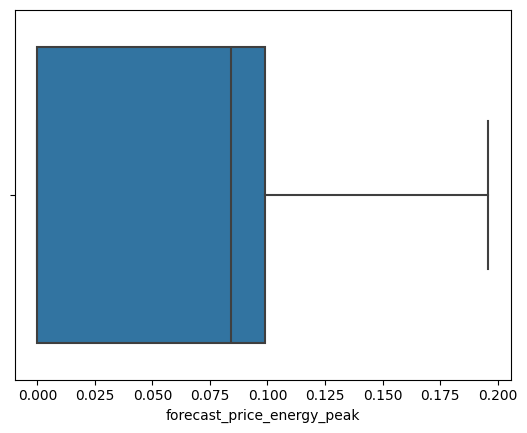

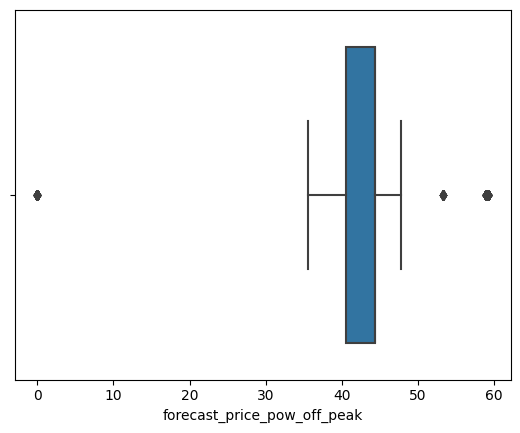

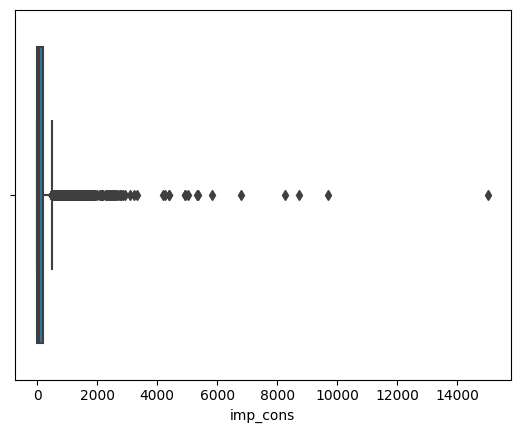

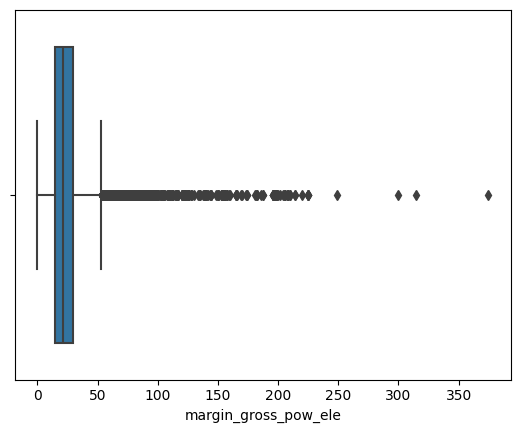

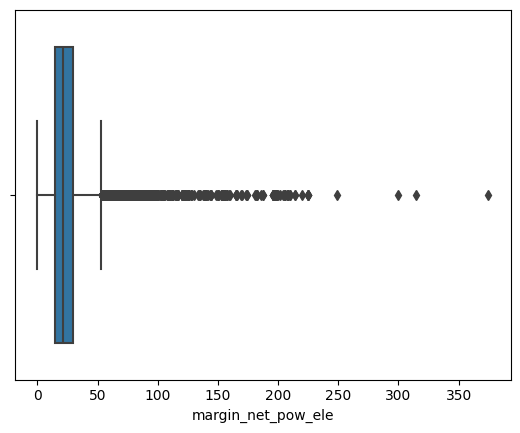

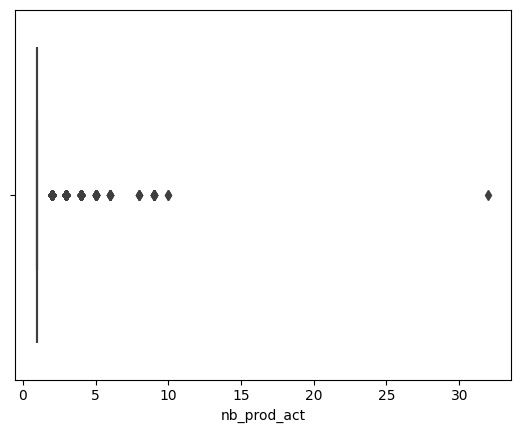

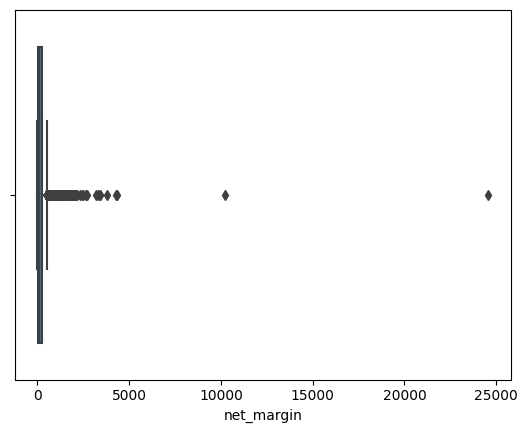

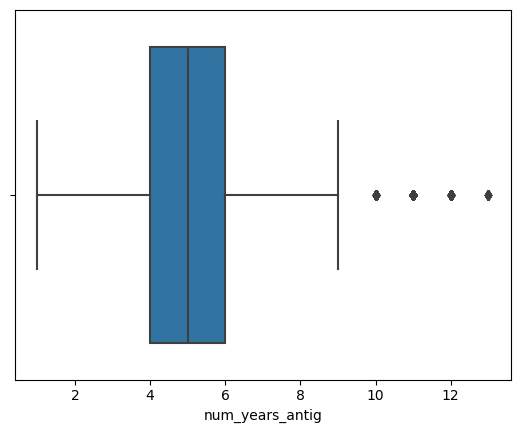

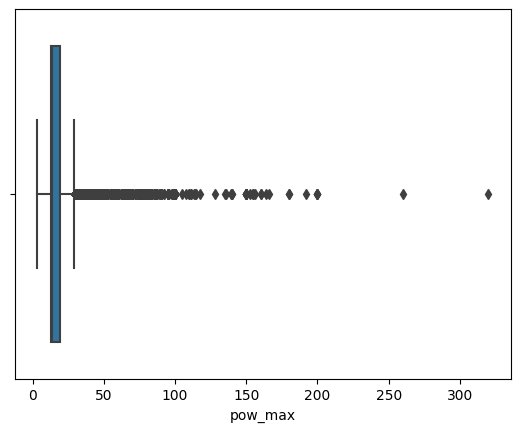

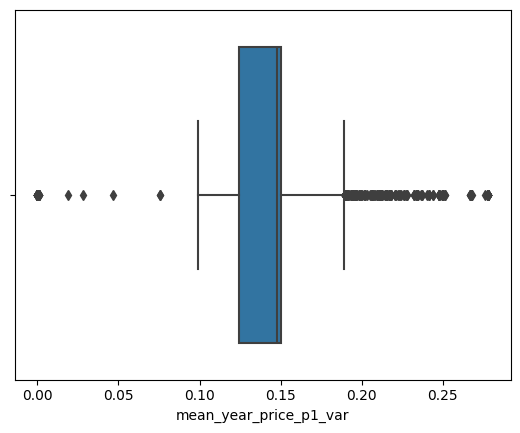

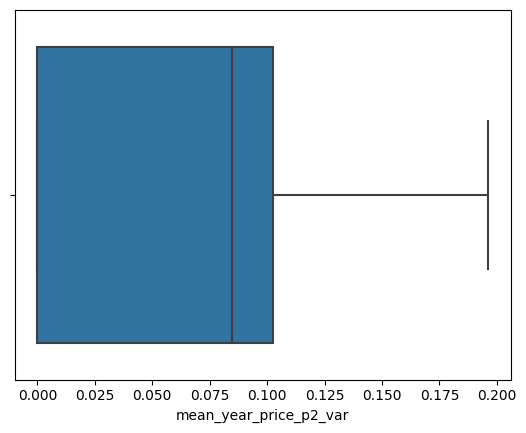

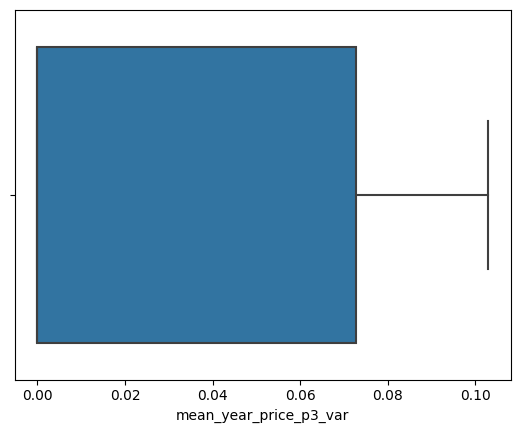

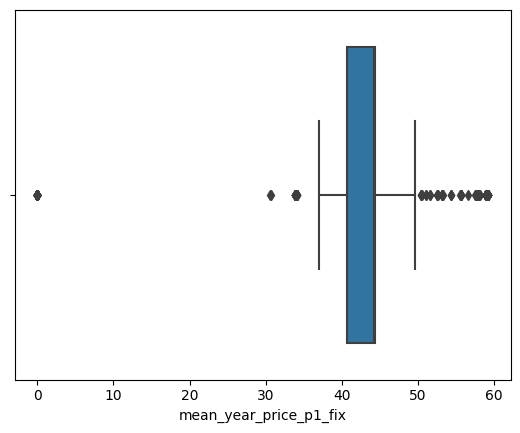

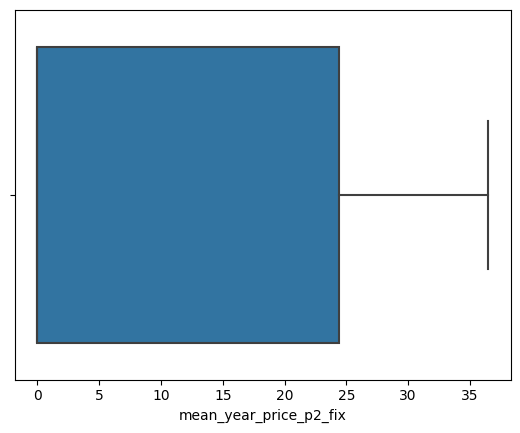

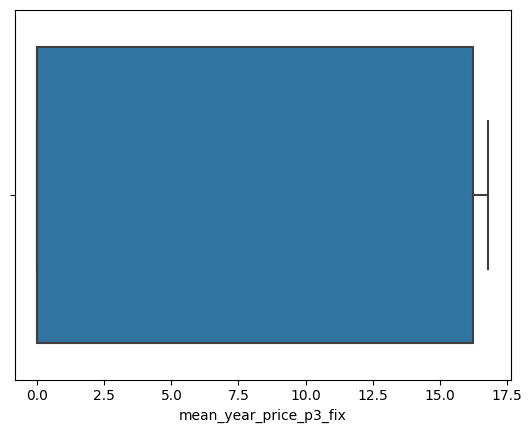

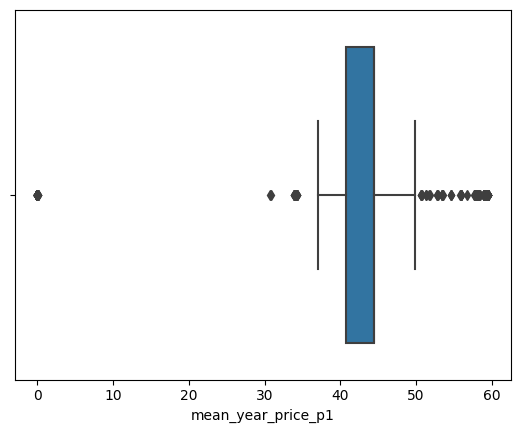

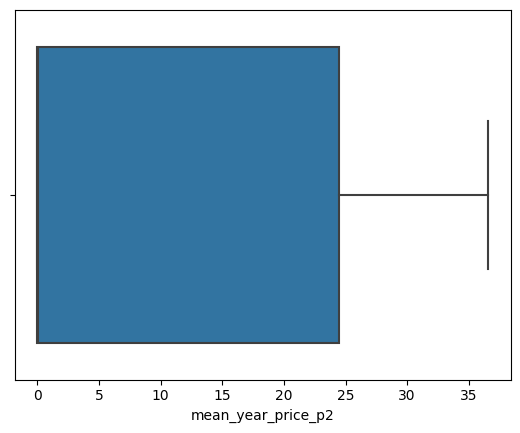

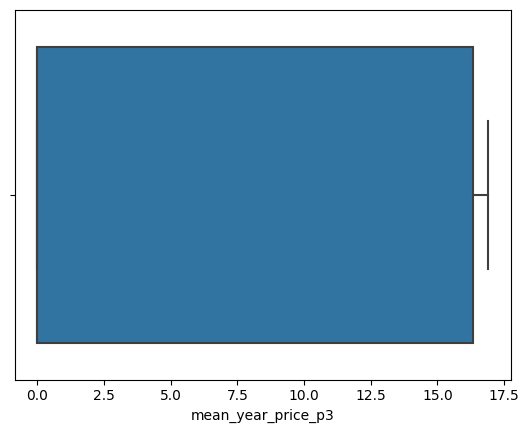

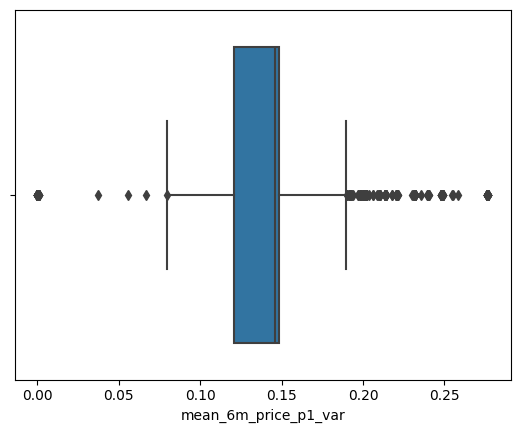

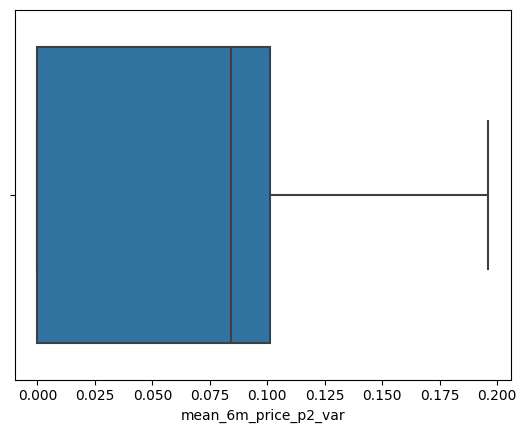

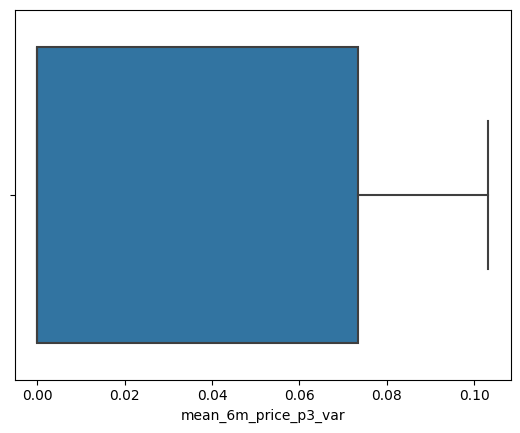

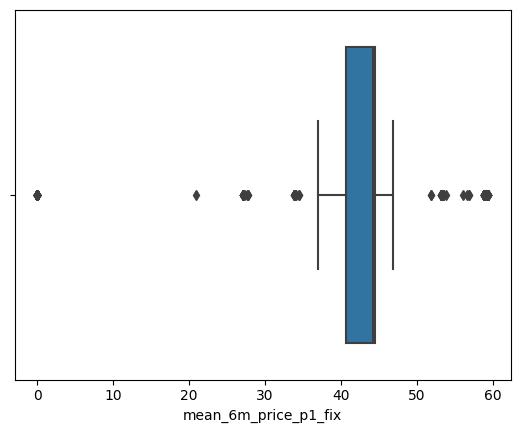

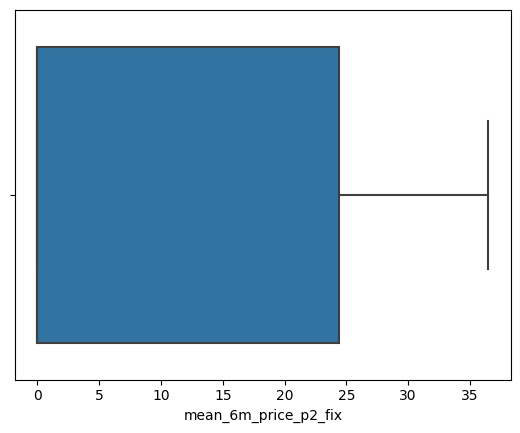

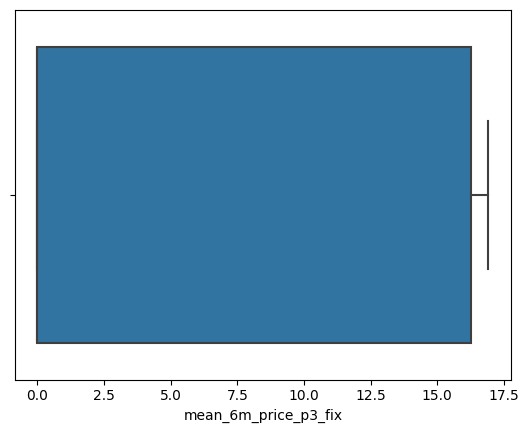

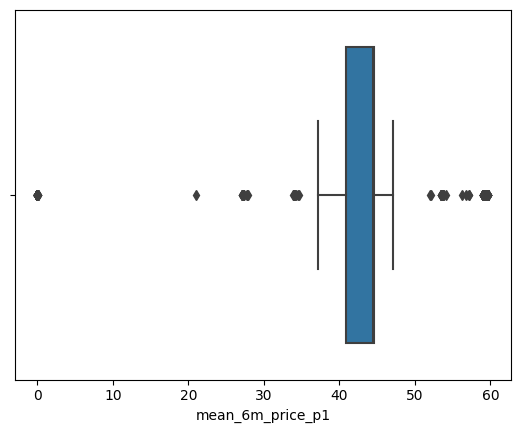

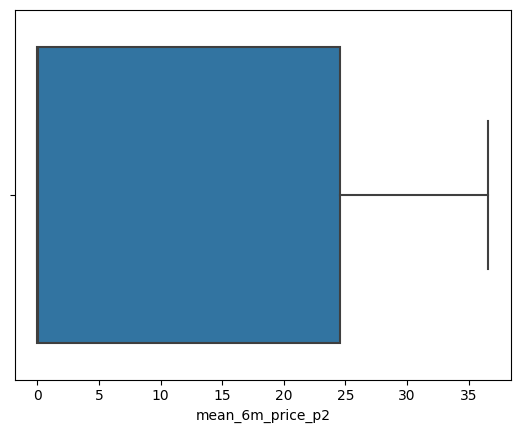

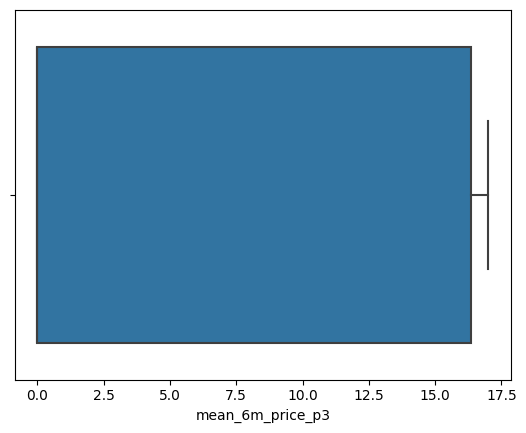

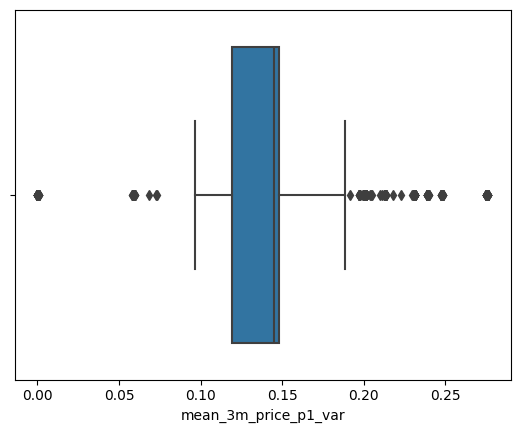

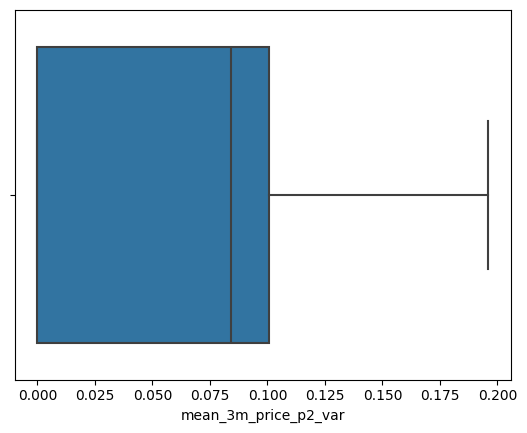

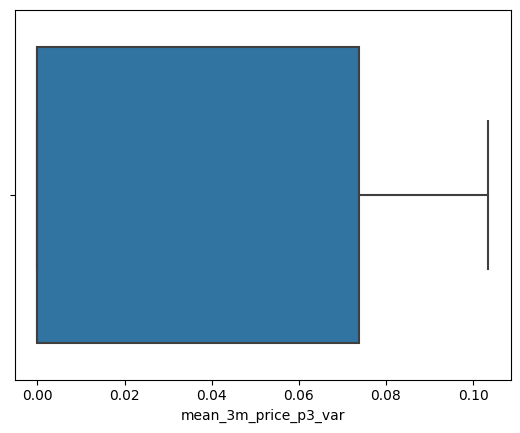

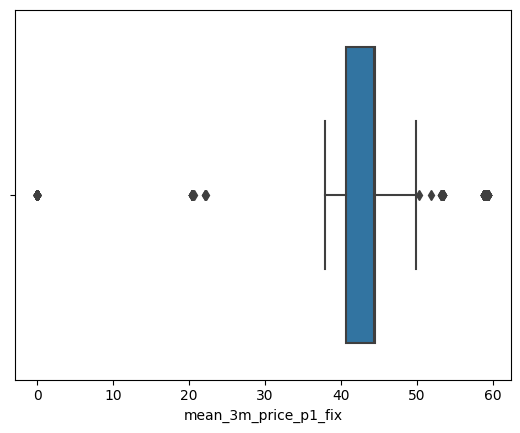

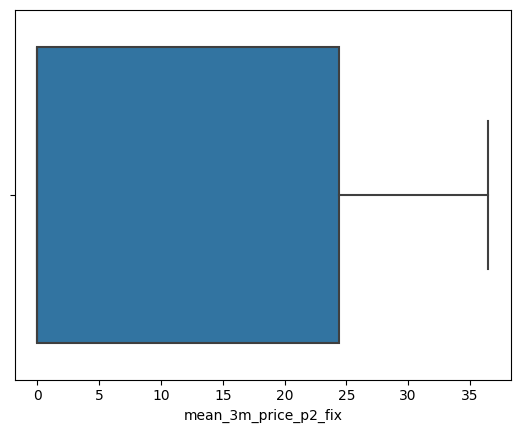

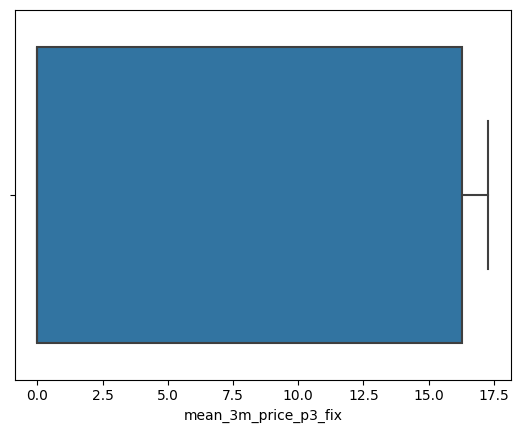

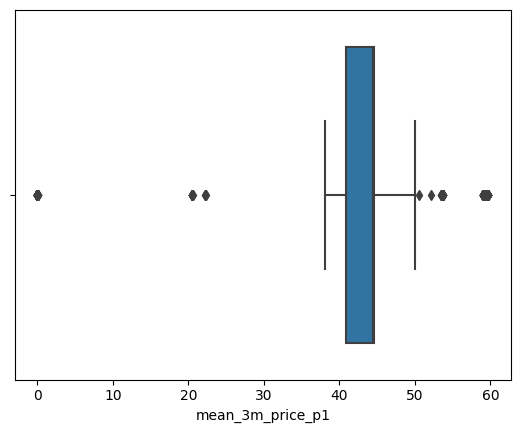

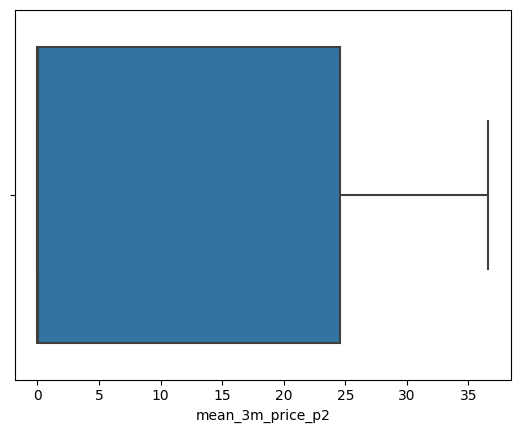

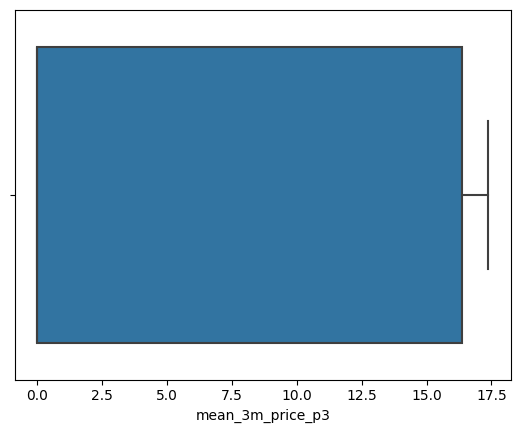

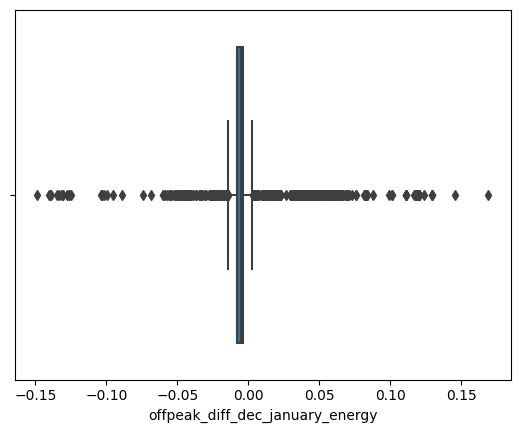

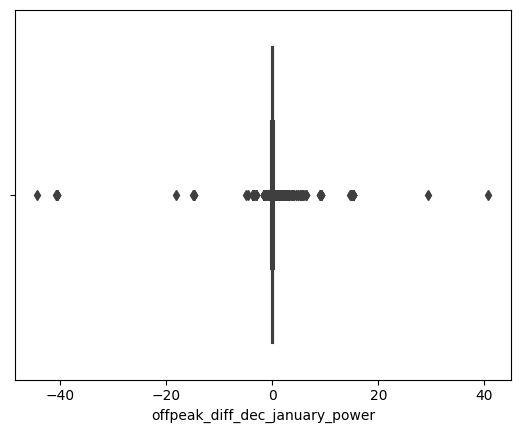

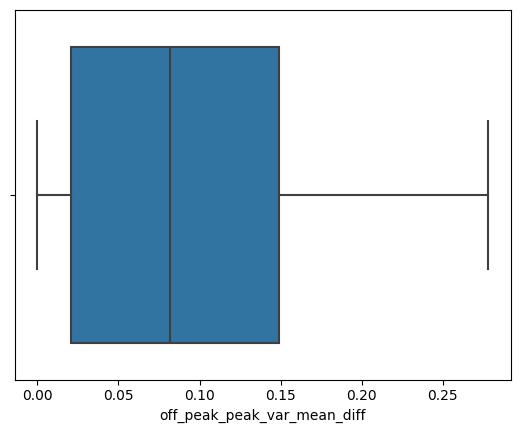

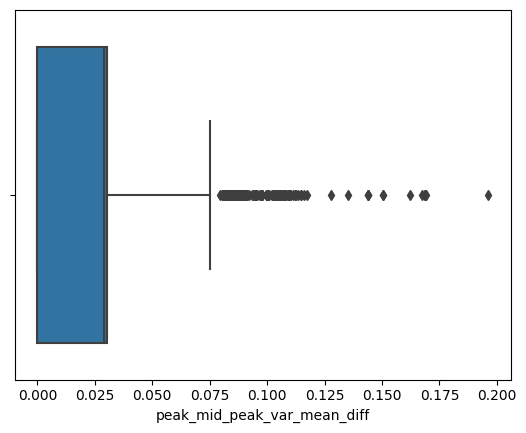

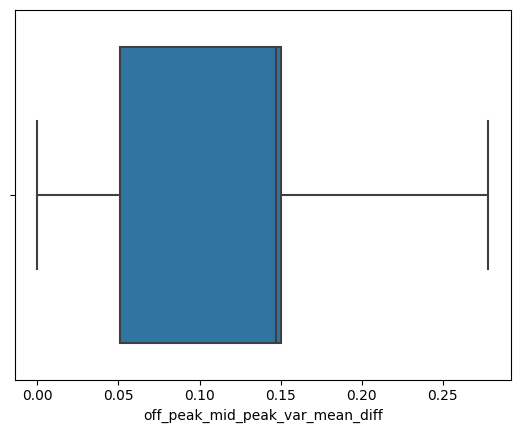

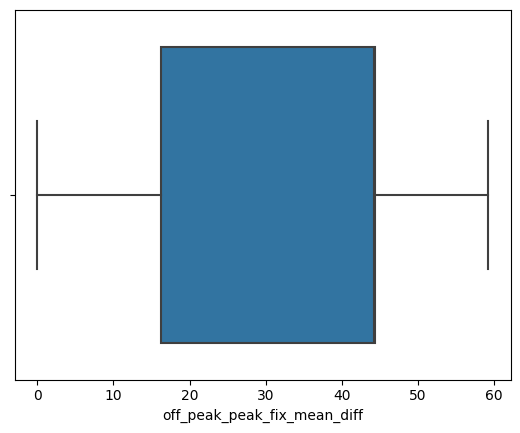

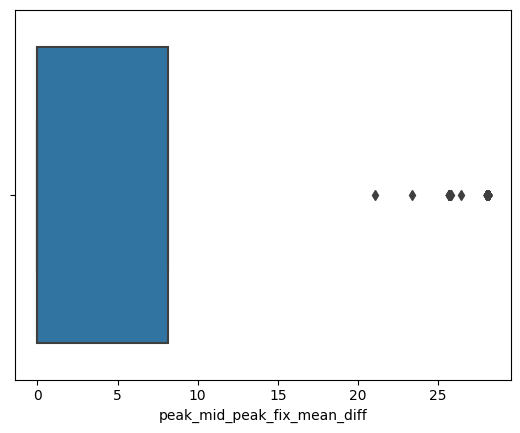

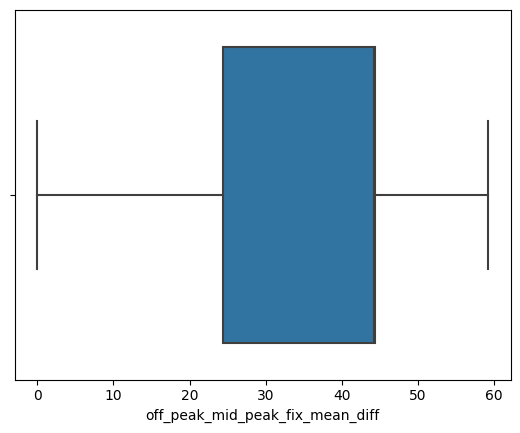

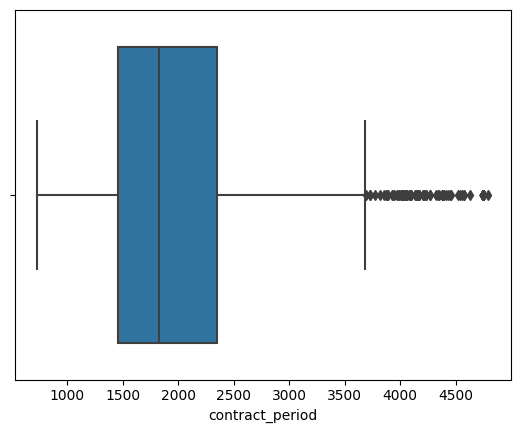

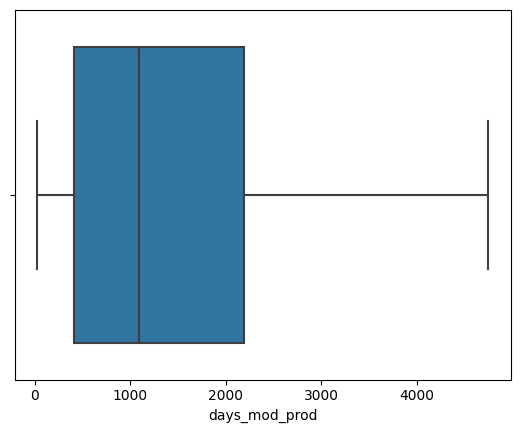

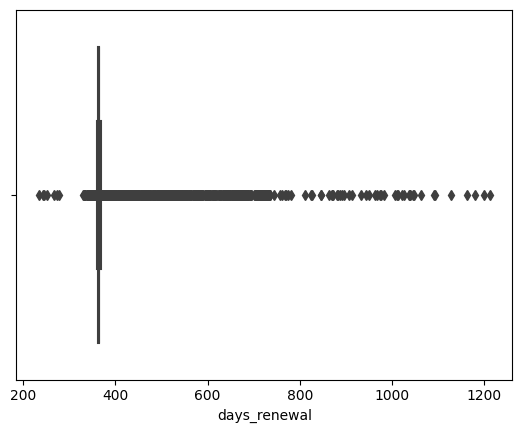

In [29]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
continuous_cols = []

for col in numeric_cols:
    if col not in categorical_cols:
        continuous_cols.append(col)
        sns.boxplot(data=data,x=col)
        plt.xlabel(col)
        plt.show()

In [30]:
outlier_count = {}

for col in continuous_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col] = len(outliers)
    
for col, count in outlier_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in cons_12m: 2084
Number of outliers in cons_gas_12m: 2611
Number of outliers in cons_last_month: 2051
Number of outliers in forecast_cons_12m: 1053
Number of outliers in forecast_cons_year: 1298
Number of outliers in forecast_discount_energy: 511
Number of outliers in forecast_meter_rent_12m: 152
Number of outliers in forecast_price_energy_off_peak: 371
Number of outliers in forecast_price_energy_peak: 0
Number of outliers in forecast_price_pow_off_peak: 345
Number of outliers in imp_cons: 1215
Number of outliers in margin_gross_pow_ele: 660
Number of outliers in margin_net_pow_ele: 660
Number of outliers in nb_prod_act: 3174
Number of outliers in net_margin: 1022
Number of outliers in num_years_antig: 389
Number of outliers in pow_max: 1535
Number of outliers in mean_year_price_p1_var: 374
Number of outliers in mean_year_price_p2_var: 0
Number of outliers in mean_year_price_p3_var: 0
Number of outliers in mean_year_price_p1_fix: 373
Number of outliers in mean_year_

In [31]:
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12720 entries, 1 to 14604
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    12720 non-null  int64  
 1   cons_gas_12m                                12720 non-null  int64  
 2   cons_last_month                             12720 non-null  int64  
 3   forecast_cons_12m                           12720 non-null  float64
 4   forecast_cons_year                          12720 non-null  int64  
 5   forecast_discount_energy                    12720 non-null  float64
 6   forecast_meter_rent_12m                     12720 non-null  float64
 7   forecast_price_energy_off_peak              12720 non-null  float64
 8   forecast_price_energy_peak                  12720 non-null  float64
 9   forecast_price_pow_off_peak                 12720 non-null  float64
 10  has_gas   

In [32]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

for column, count in columns_with_missing_values.items():
    print(f"Column '{column}' has {count} missing values.")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12720 entries, 1 to 14604
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    12720 non-null  int64  
 1   cons_gas_12m                                12720 non-null  int64  
 2   cons_last_month                             12720 non-null  int64  
 3   forecast_cons_12m                           12720 non-null  float64
 4   forecast_cons_year                          12720 non-null  int64  
 5   forecast_discount_energy                    12720 non-null  float64
 6   forecast_meter_rent_12m                     12720 non-null  float64
 7   forecast_price_energy_off_peak              12720 non-null  float64
 8   forecast_price_energy_peak                  12720 non-null  float64
 9   forecast_price_pow_off_peak                 12720 non-null  float64
 10  has_gas   

In [34]:
continuous_cols = []
skewness_dict = {}

for col in numeric_cols:
    if col not in categorical_cols:
        continuous_cols.append(col)
        skewness = data[col].skew()
        skewness_dict[col] = skewness
        print(f"Skewness for {col}: {skewness}")


# Print columns with significant, highly, and left-skewed values
significant_skewed_cols = [col for col, skew in skewness_dict.items() if 0.5 < (skew) < 1.0]
significant_left_skewed_cols = [col for col, skew in skewness_dict.items() if -1.0 < (skew) < -0.5]
highly_skewed_cols = [col for col, skew in skewness_dict.items() if (skew) > 1.0]
highly_left_skewed_cols = [col for col, skew in skewness_dict.items() if (skew) < -1.0]

print(f"\nColumns with significnat right skewed :{significant_skewed_cols}")
print(f"\nColumns with significant left skewed: {significant_left_skewed_cols}")
print(f"\nColumns with high skewness: {highly_skewed_cols}")
print(f"\nColumns with left skewness: {highly_left_skewed_cols}")

Skewness for cons_12m: 6.102840429776213
Skewness for cons_gas_12m: 9.690241296351616
Skewness for cons_last_month: 6.479255045920386
Skewness for forecast_cons_12m: 4.94509211673579
Skewness for forecast_cons_year: 18.079782781820512
Skewness for forecast_discount_energy: 8.35138900145524
Skewness for forecast_meter_rent_12m: 1.475152020629607
Skewness for forecast_price_energy_off_peak: -0.37581011254131946
Skewness for forecast_price_energy_peak: -0.027137361523793348
Skewness for forecast_price_pow_off_peak: -4.952388744331989
Skewness for imp_cons: 14.454505092905757
Skewness for margin_gross_pow_ele: 4.454462394056856
Skewness for margin_net_pow_ele: 4.454933504385708
Skewness for nb_prod_act: 9.623453952872275
Skewness for net_margin: 40.68724706621065
Skewness for num_years_antig: 1.4129811400369152
Skewness for pow_max: 5.934356089627125
Skewness for mean_year_price_p1_var: -1.0202605692298437
Skewness for mean_year_price_p2_var: -0.022414391513408866
Skewness for mean_year_pr

#### We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

In [35]:
Columns_significant_right_skewed = ['mean_year_price_p2_fix','mean_year_price_p3_fix','mean_year_price_p2', 
                       'mean_year_price_p3','mean_6m_price_p2_fix','mean_6m_price_p3_fix', 
                       'mean_6m_price_p2','mean_6m_price_p3','mean_3m_price_p2_fix', 
                       'mean_3m_price_p3_fix','mean_3m_price_p2','mean_3m_price_p3', 
                       'days_mod_prod']
    

Columns_significant_left_skewed = ['mean_6m_price_p1_var', 'mean_3m_price_p1_var', 'off_peak_mid_peak_fix_mean_diff'] 

Columns_high_skewness = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 
                         'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 
                         'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 
                         'net_margin', 'num_years_antig', 'pow_max', 'offpeak_diff_dec_january_energy', 
                         'peak_mid_peak_var_mean_diff', 'peak_mid_peak_fix_mean_diff', 'contract_period']

Columns_left_skewness = ['forecast_price_pow_off_peak', 'mean_year_price_p1_var', 'mean_year_price_p1_fix', 
                        'mean_year_price_p1', 'mean_6m_price_p1_fix', 'mean_6m_price_p1', 
                        'mean_3m_price_p1_fix', 'mean_3m_price_p1', 'offpeak_diff_dec_january_power', 
                        'days_renewal']

In [36]:
data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.272000e+04  1.272000e+04     12720.000000       12720.000000   
mean   1.581479e+05  2.822348e+04     16036.417060        1810.664830   
std    5.745737e+05  1.645974e+05     64764.214845        2202.617133   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.557000e+03  0.000000e+00         0.000000         483.472500   
50%    1.384750e+04  0.000000e+00       770.000000        1082.075000   
75%    3.969750e+04  0.000000e+00      3313.000000        2343.385000   
max    6.207104e+06  4.154590e+06    771203.000000       61357.170000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        12720.000000              12720.000000             12720.000000   
mean          1361.993239                  0.358019                63.004806   
std           3200.312428                  2.993055                65.895963   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.170000   
50%            302.000000                  0.000000                18.730000   
75%           1694.250000                  0.000000               131.040000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    12720.000000                12720.000000   
mean                         0.136191                    0.050041   
std                          0.023586                    0.048596   
min                          0.000000                    0.000000   
25%                          0.116329                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  days_mod_prod  days_renewal  \
count                 12720.000000  ...   12720.000000  12720.000000   
mean                     43.117700  ...    1353.363522    364.138836   
std                       4.591603  ...     908.217716      1.283864   
min                       0.000000  ...      31.000000    360.000000   
25%                      40.606701  ...     426.000000    364.000000   
50%                      44.311378  ...    1096.000000    365.000000   
75%                      44.311378  ...    2192.000000    365.000000   
max                      59.266378  ...    4749.000000    368.000000   

       channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
count     12720.000000                              12720.000000   
mean          0.265173                                  0.059277   
std           0.441443                                  0.236151   
min           0.000000                                  0.000000   
25%           0.000000                                  0.000000   
50%           0.000000                                  0.000000   
75%           1.000000                                  0.000000   
max           1.000000                                  1.000000   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
count                              12720.000000   
mean                                   0.455896   
std                                    0.498071   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                    1.000000   

       channel_lmkebamcaaclubfxadlmueccxoimlema  \
count                              12720.000000   
mean                                   0.127909   
std                                    0.334001   
min                                    0.000000   
25%                              

In [37]:
columns_with_zero_min = data.columns[data.min() == 0]
print("Columns with minimum value equal to 0:")
print(columns_with_zero_min)

Columns with minimum value equal to 0:
Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_

In [38]:
columns_with_zero_min = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix',
       'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3',
       'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff',
       'off_peak_mid_peak_var_mean_diff', 'off_peak_peak_fix_mean_diff',
       'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

for col in columns_with_zero_min:
    data[col] = np.log10(data[col] + 1)

for col in data.columns:
    if col not in columns_with_zero_min and col not in categorical_cols and col!='offpeak_diff_dec_january_energy' and col!='offpeak_diff_dec_january_power':
        data[col] = np.log10(data[col])             

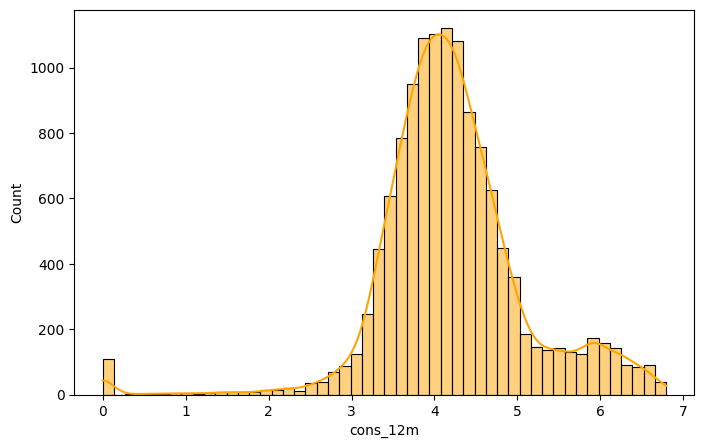

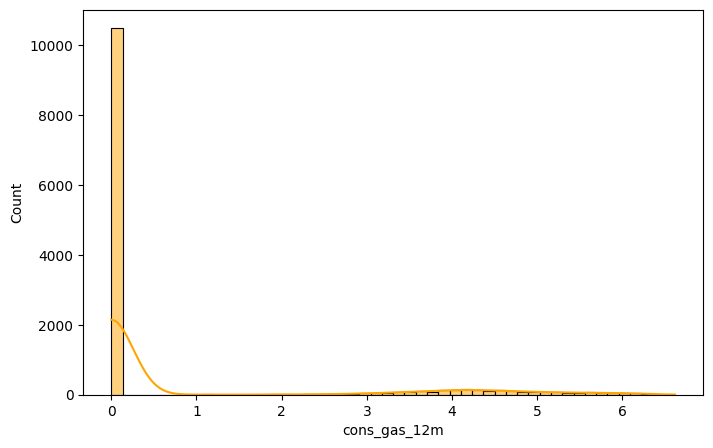

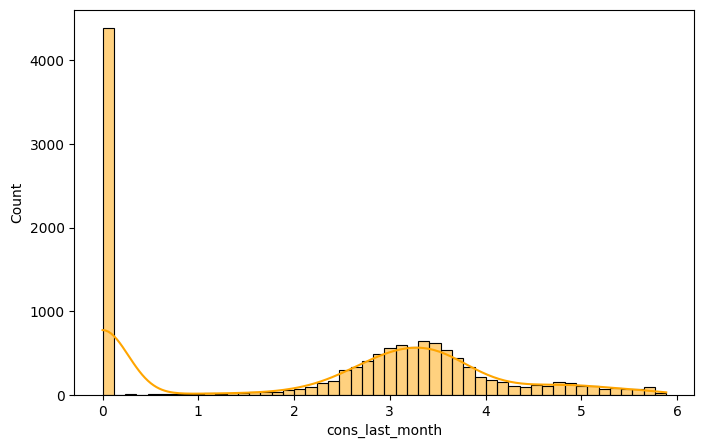

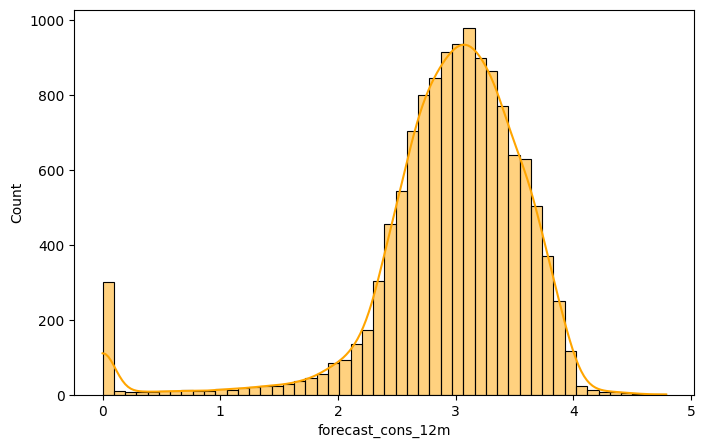

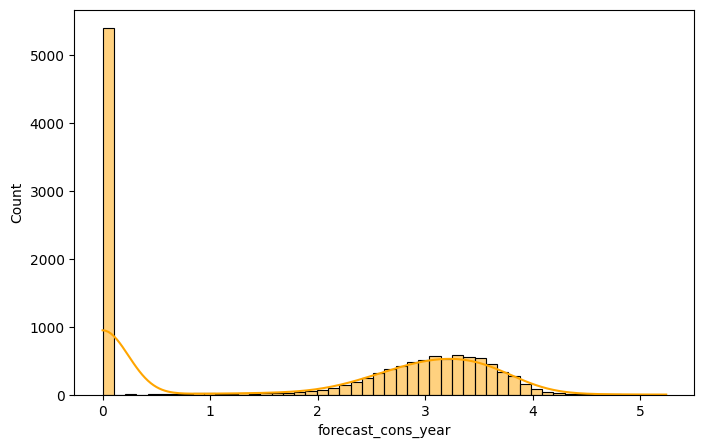

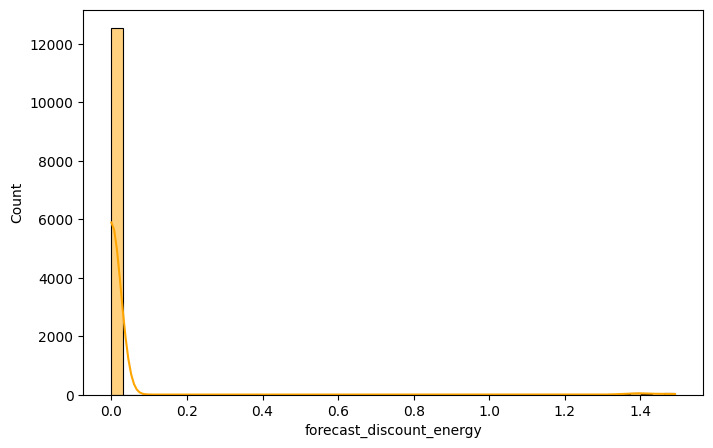

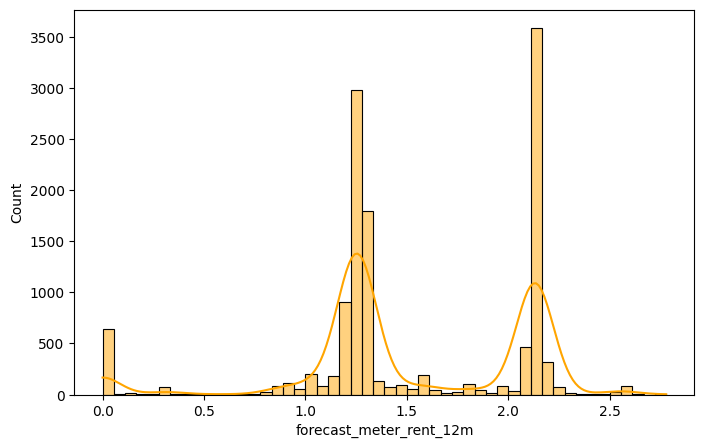

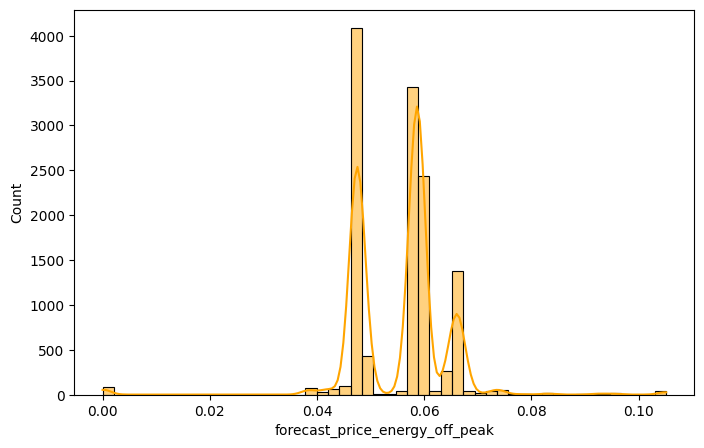

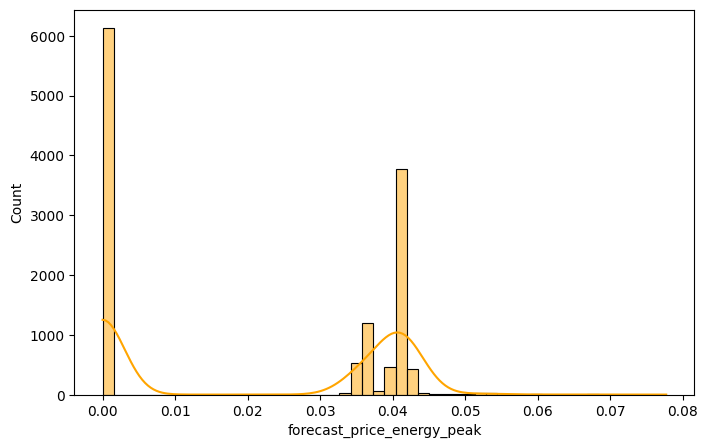

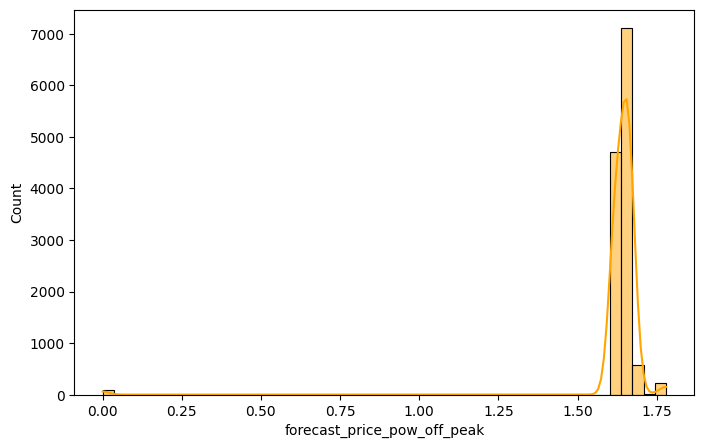

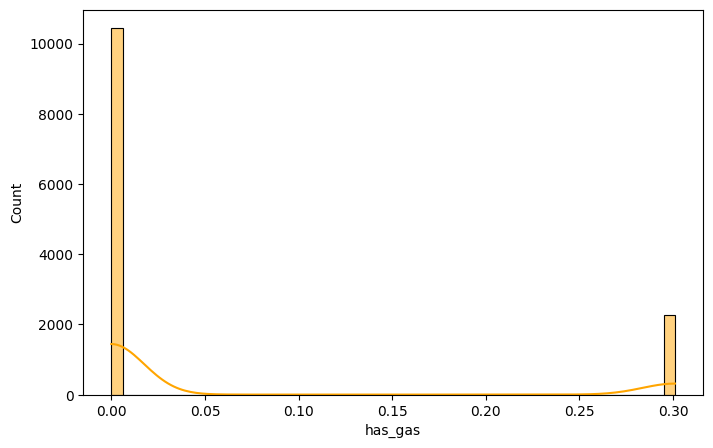

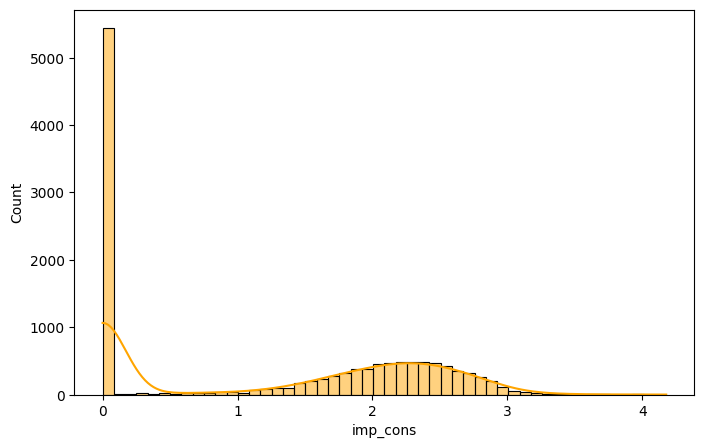

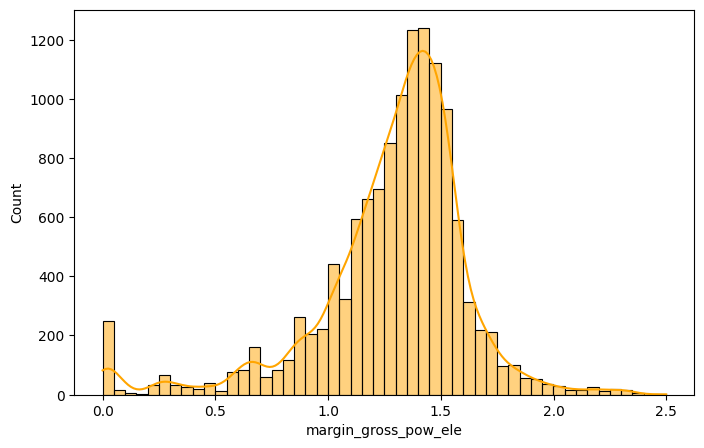

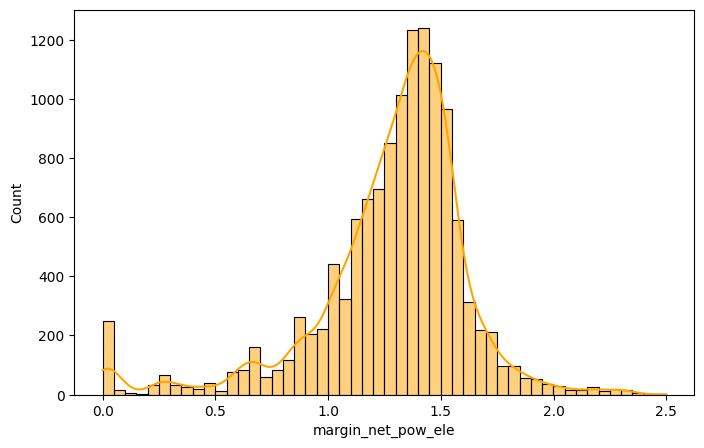

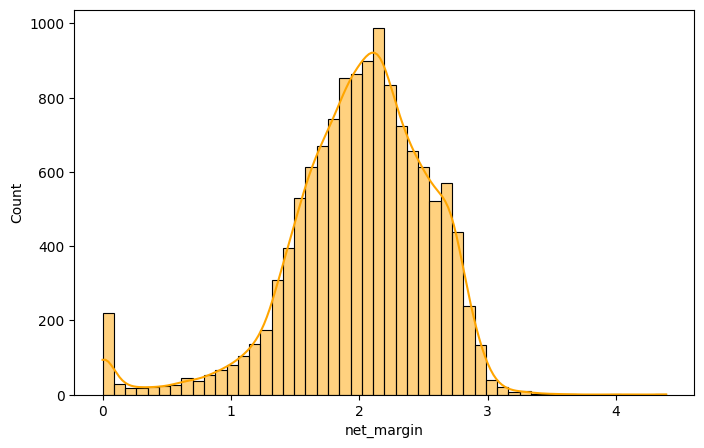

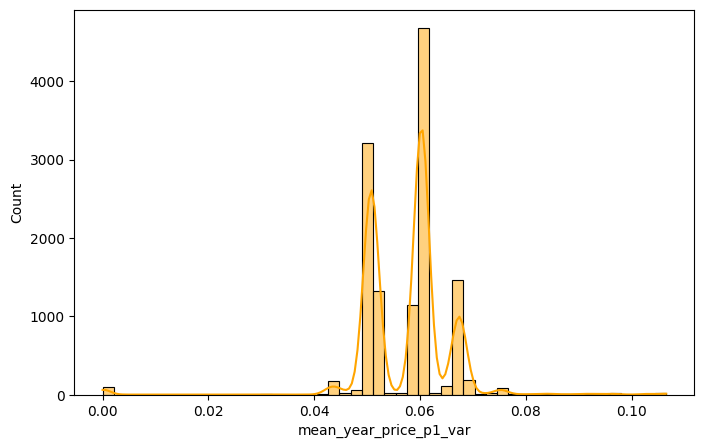

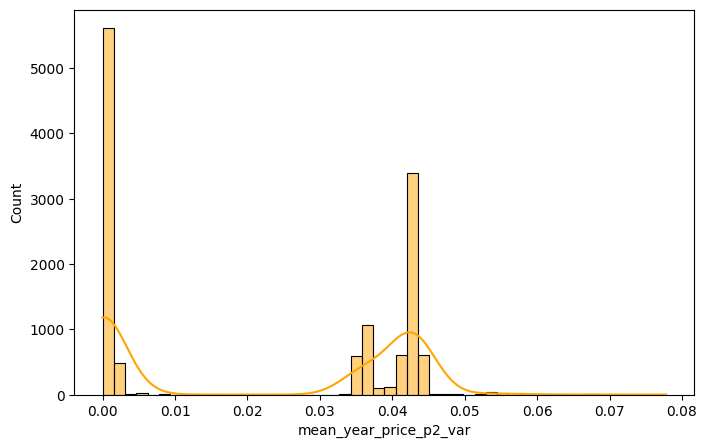

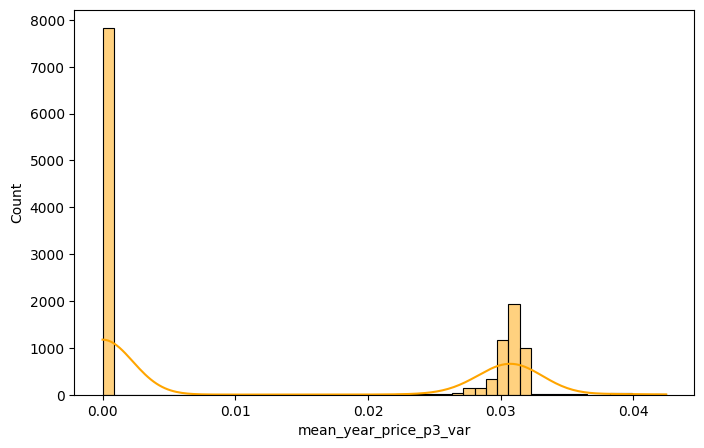

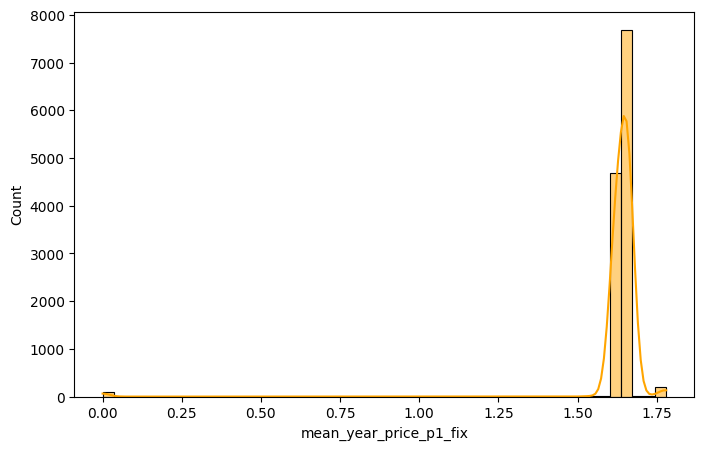

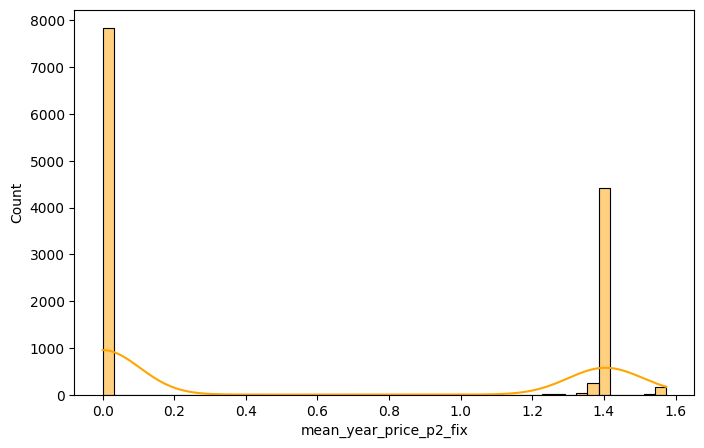

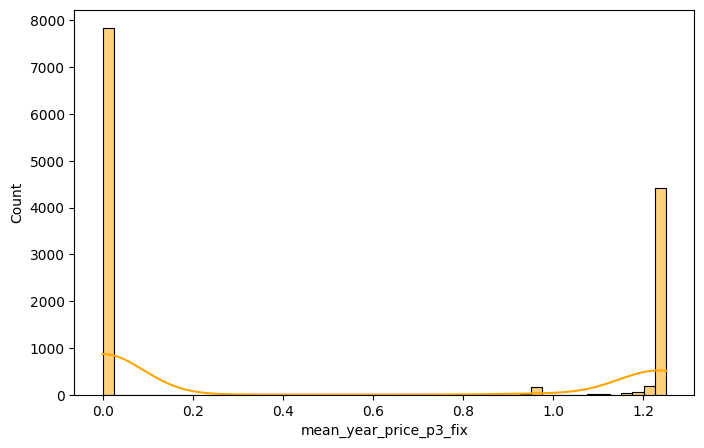

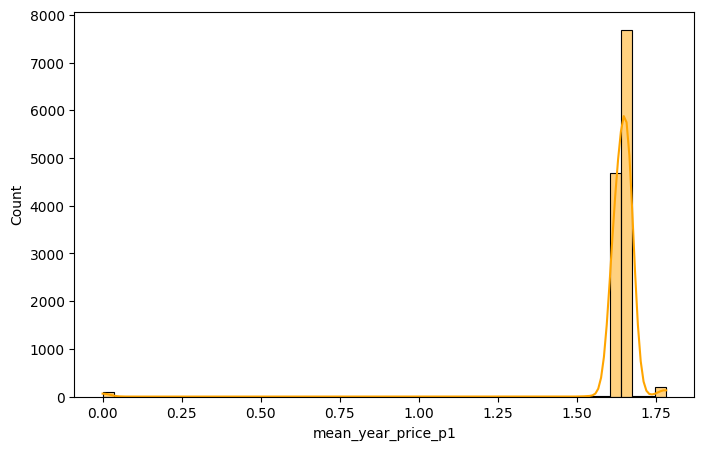

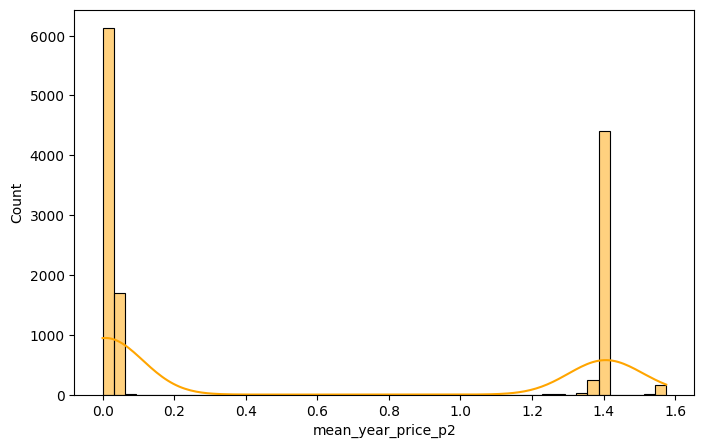

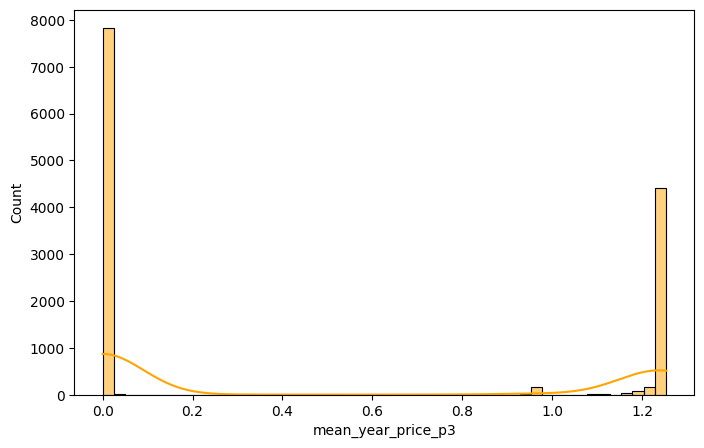

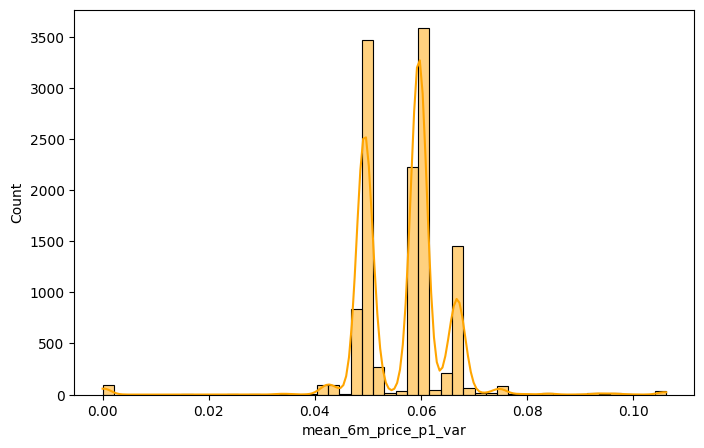

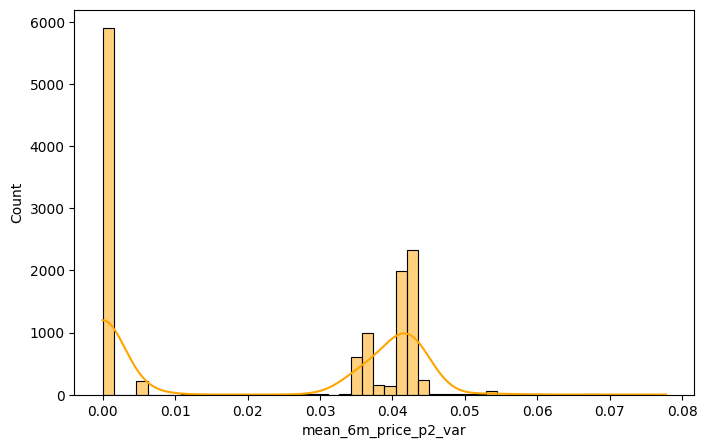

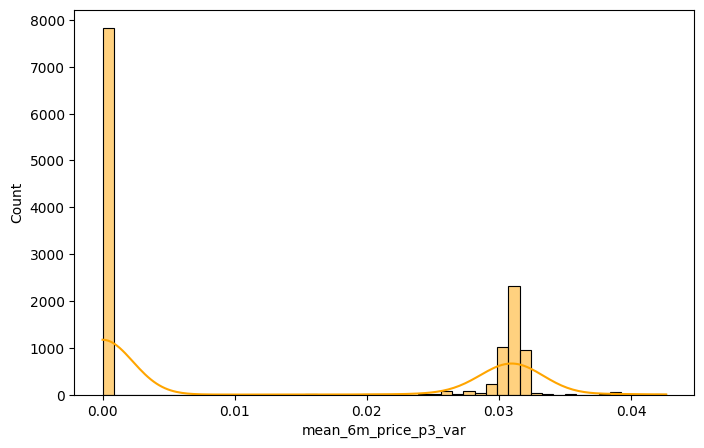

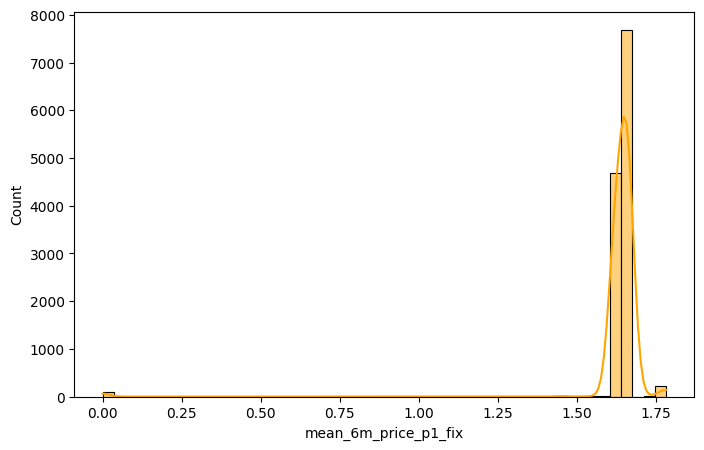

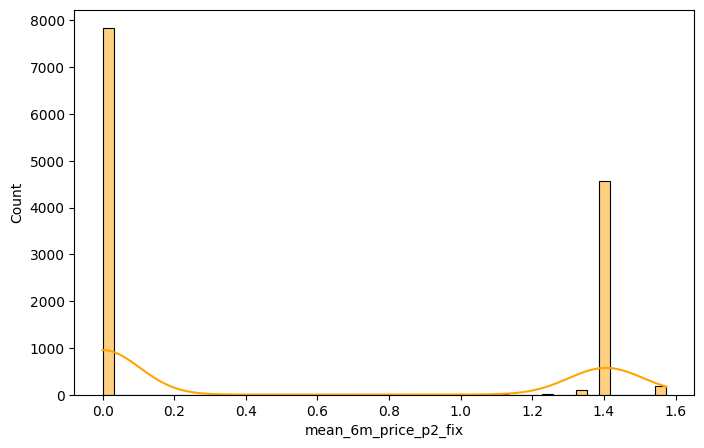

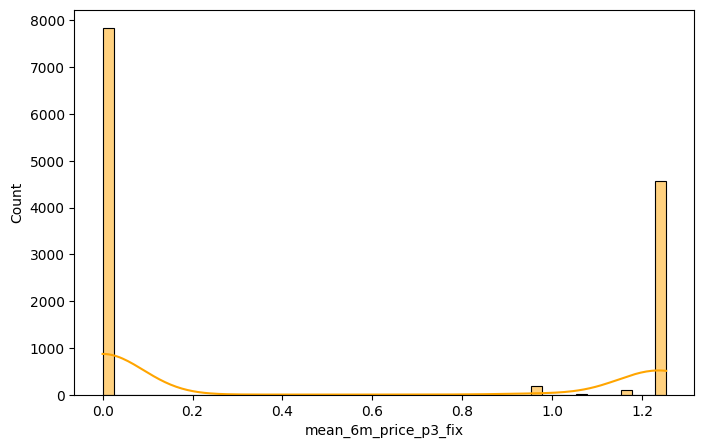

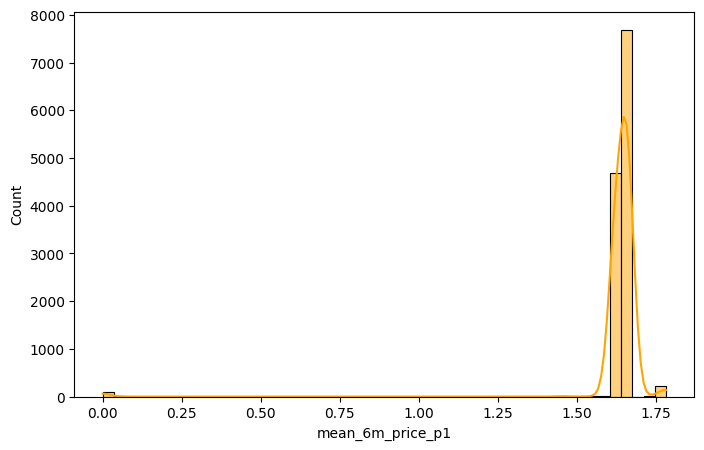

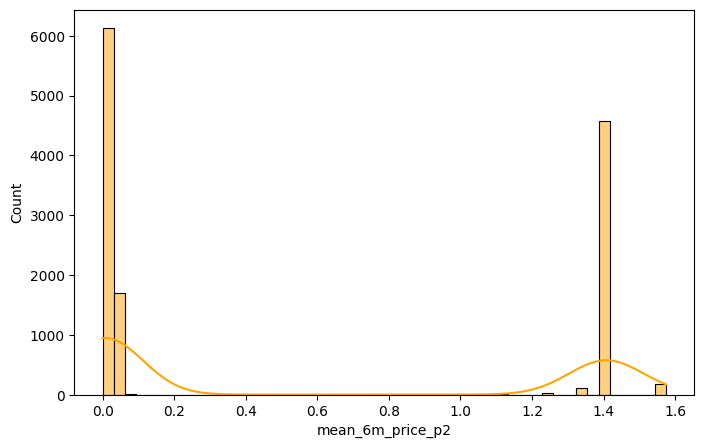

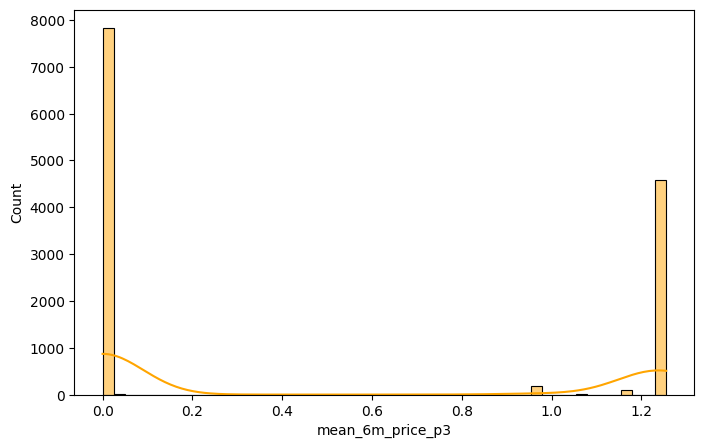

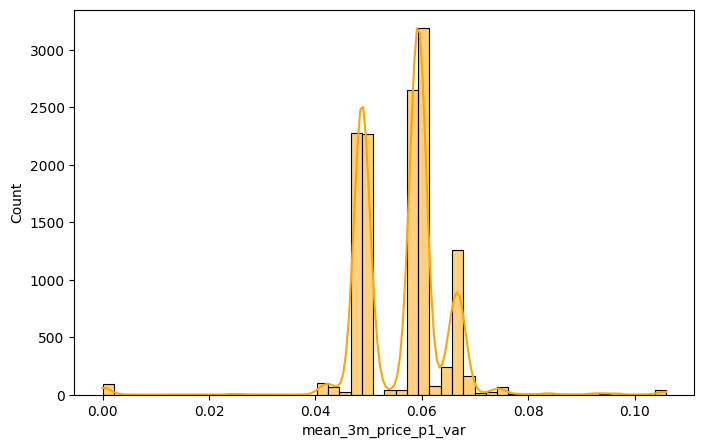

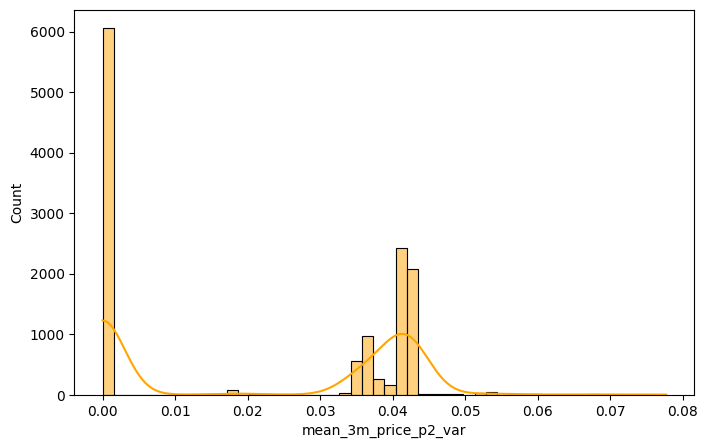

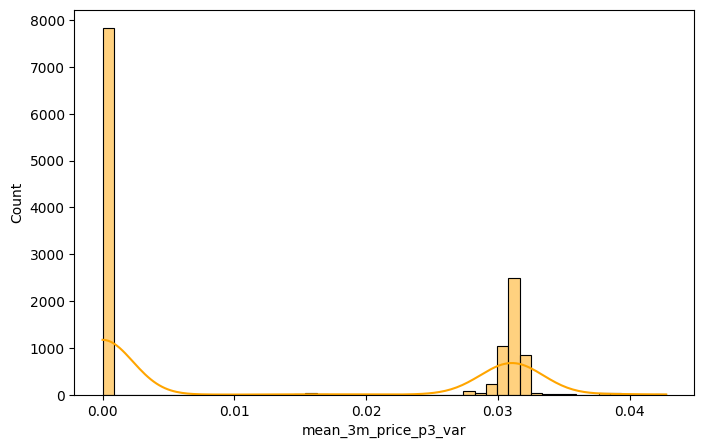

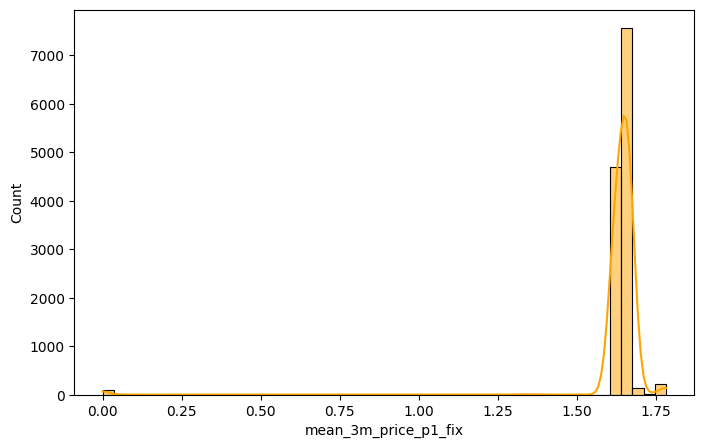

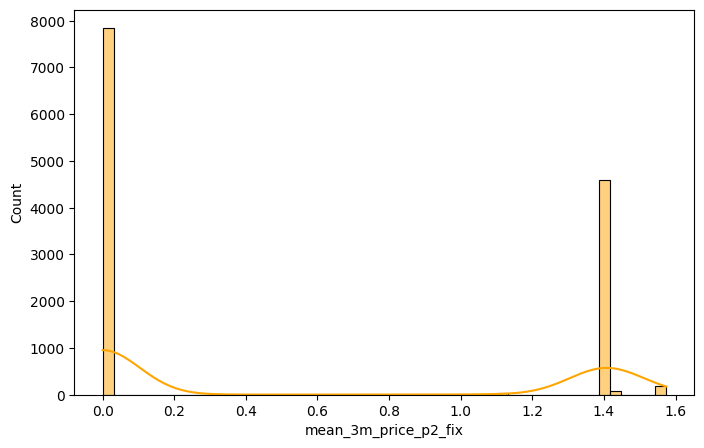

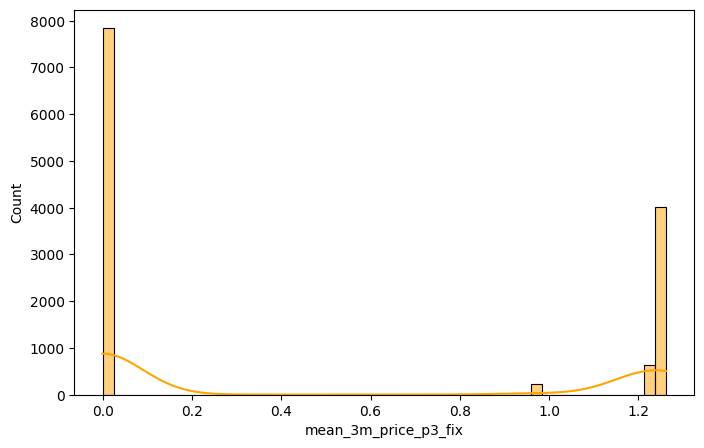

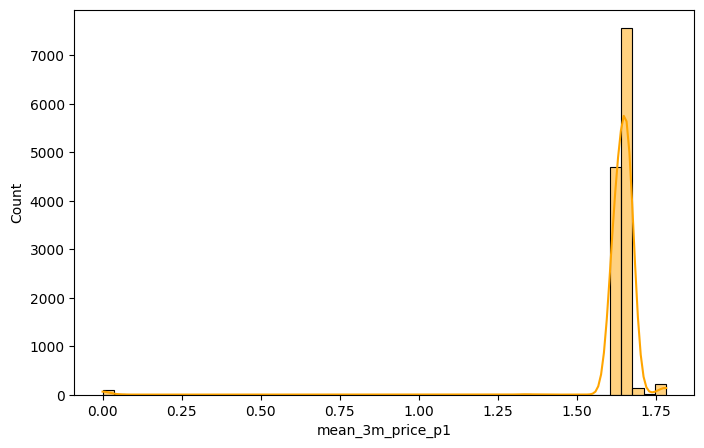

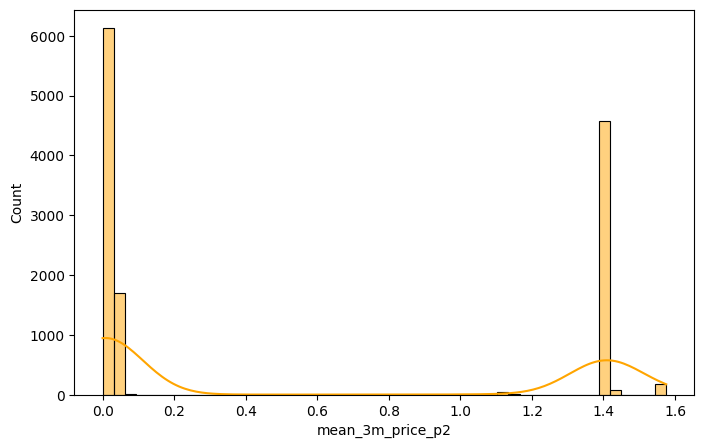

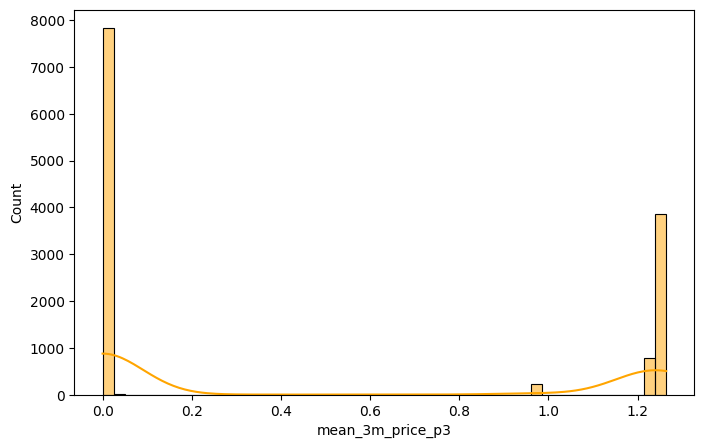

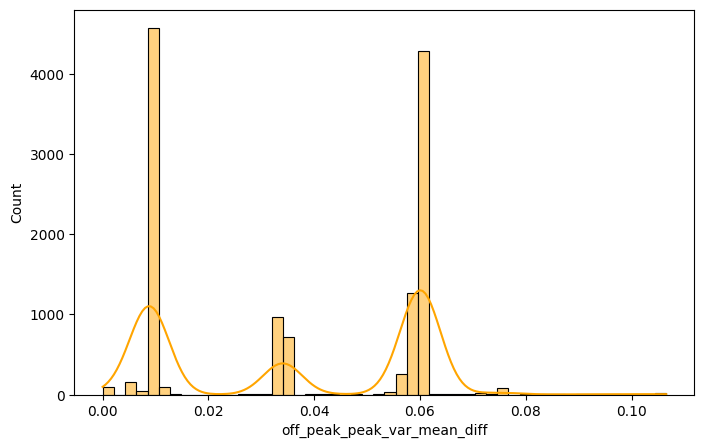

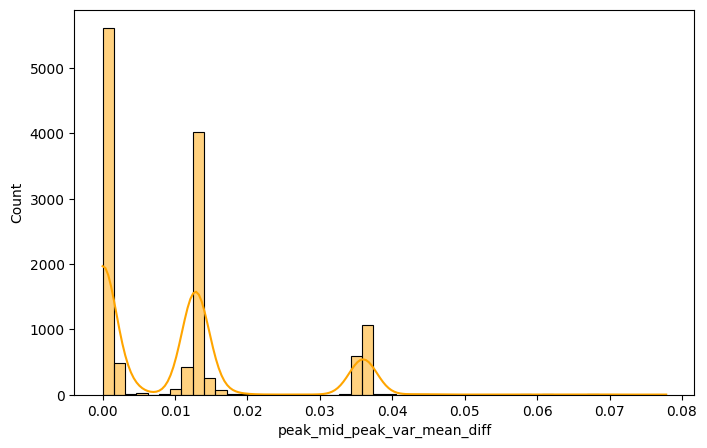

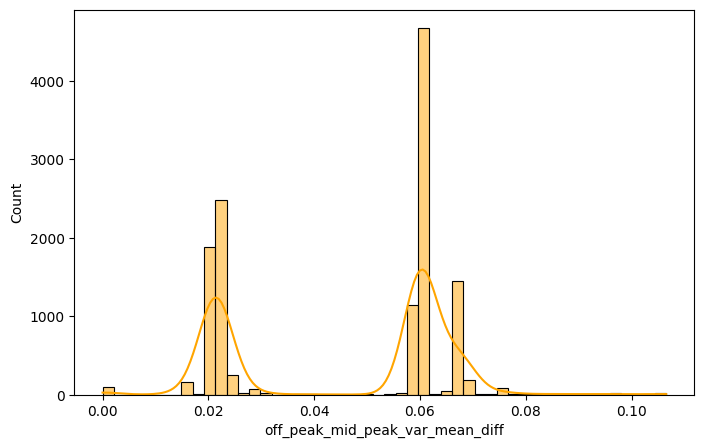

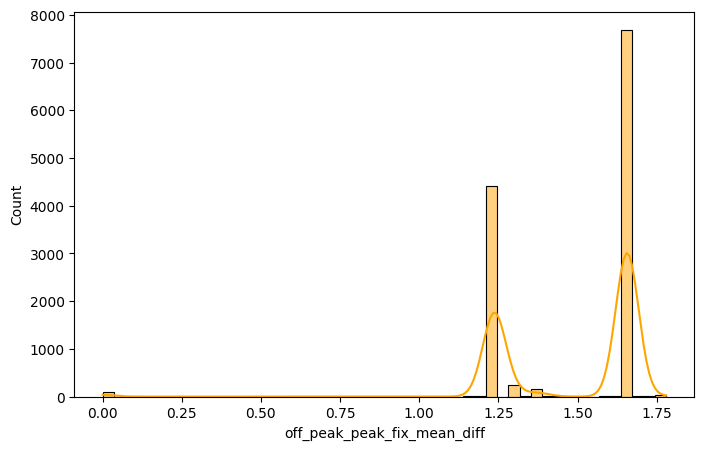

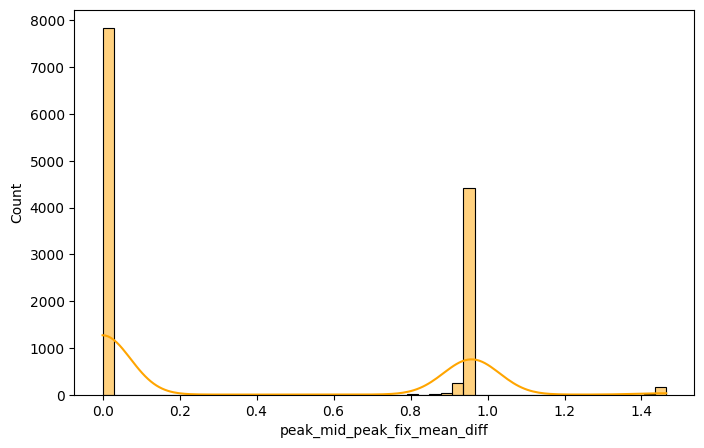

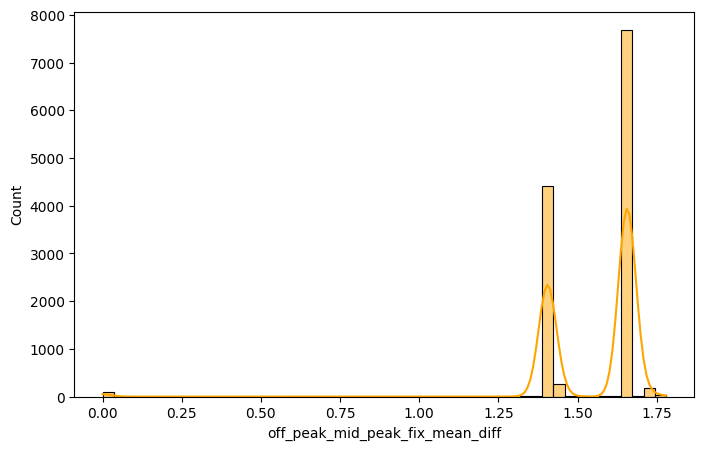

In [39]:
for col in columns_with_zero_min:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], color='orange',kde=True,bins=50)  # kernel density estimation
    plt.show()

Lets check the model performance and then comback to futuer feature engineering of the data, as of now we will continue with the data

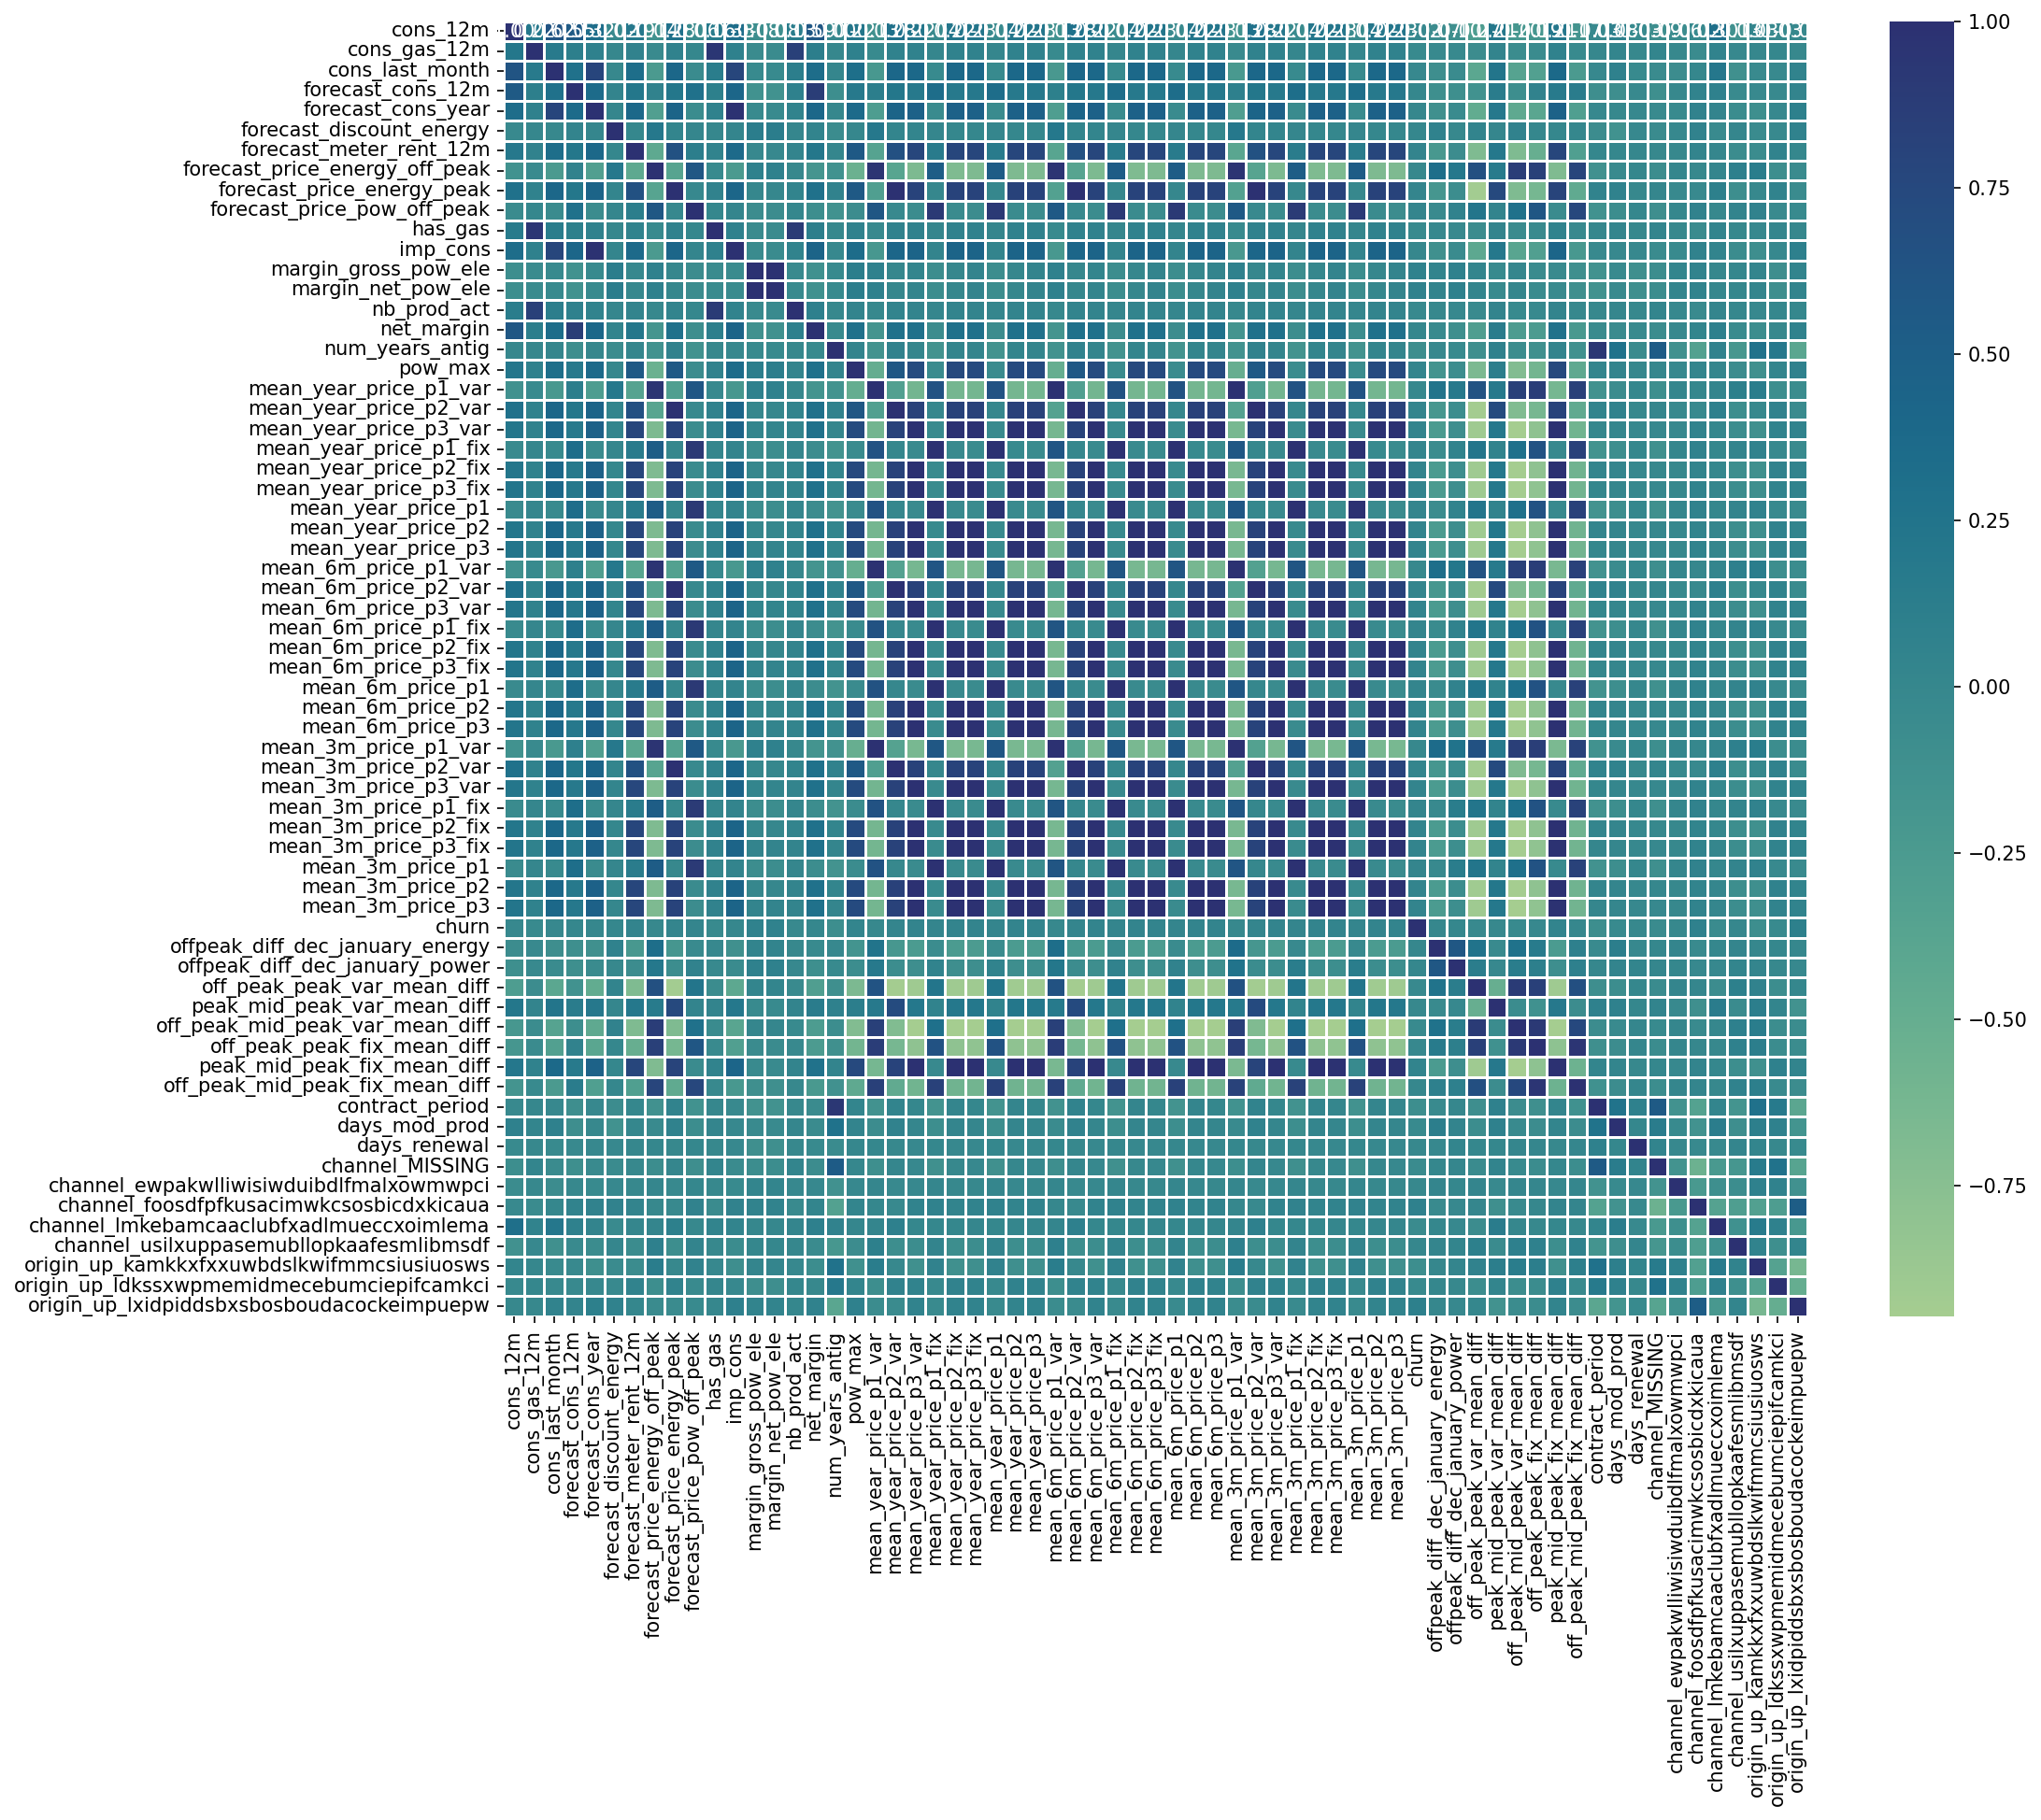

In [40]:
correlation_matrix = data.corr()
plt.figure(figsize=(15,12),dpi=150)
sns.heatmap(correlation_matrix,annot=True, cmap='crest', fmt='.2f', linewidths=.5)
plt.show()

- We can clearly see the high correlation among independent variables

In [41]:
x = data.drop("churn",axis=1)
y = data["churn"]

In [42]:
x.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
1  3.668479           0.0         0.000000           2.280920   
2  2.736397           0.0         0.000000           1.689841   
3  3.200029           0.0         0.000000           2.382089   
4  3.646011           0.0         2.721811           2.650065   
5  3.919235           0.0         3.300813           2.901970   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   
5            3.300813                       0.0                 1.493040   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
1                        0.059075                    0.000000   
2                        0.066622                    0.036589   
3                        0.059448                    0.000000   
4                        0.048014                    0.041399   
5                        0.066242                    0.035882   

   forecast_price_pow_off_peak  ...  days_mod_prod  days_renewal  \
1                     1.656207  ...       3.409257      2.562293   
2                     1.656207  ...       3.340841      2.562293   
3                     1.656207  ...       3.340841      2.562293   
4                     1.619163  ...       3.351216      2.561101   
5                     1.665660  ...       2.606381      2.562293   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   
5                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
1                                         0   
2                                         1   
3                                         0   
4                                         0   
5                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
1                                         0   
2                                         0   
3                                         1   
4                                         0   
5                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         1   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
1                                           1   
2                                           1   
3                                           1   
4                                           1   
5                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
1                                           0  
2                                           0  
3                                           0  
4                                           0  
5                                           1  

[5 rows x 64 columns]

## Checking for multicollinearity

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12720 entries, 1 to 14604
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    12720 non-null  float64
 1   cons_gas_12m                                12720 non-null  float64
 2   cons_last_month                             12720 non-null  float64
 3   forecast_cons_12m                           12720 non-null  float64
 4   forecast_cons_year                          12720 non-null  float64
 5   forecast_discount_energy                    12720 non-null  float64
 6   forecast_meter_rent_12m                     12720 non-null  float64
 7   forecast_price_energy_off_peak              12720 non-null  float64
 8   forecast_price_energy_peak                  12720 non-null  float64
 9   forecast_price_pow_off_peak                 12720 non-null  float64
 10  has_gas   

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [45]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(vif_data.to_string(index=True))

                                       Feature            VIF
0                                     cons_12m          92.20
1                                 cons_gas_12m          10.97
2                              cons_last_month          16.03
3                            forecast_cons_12m         333.15
4                           forecast_cons_year         117.35
5                     forecast_discount_energy           2.17
6                      forecast_meter_rent_12m          22.56
7               forecast_price_energy_off_peak       13788.49
8                   forecast_price_energy_peak        1217.93
9                  forecast_price_pow_off_peak       15201.70
10                                     has_gas          15.38
11                                    imp_cons         107.87
12                        margin_gross_pow_ele    11635262.23
13                          margin_net_pow_ele    11636694.54
14                                 nb_prod_act           5.78
15      

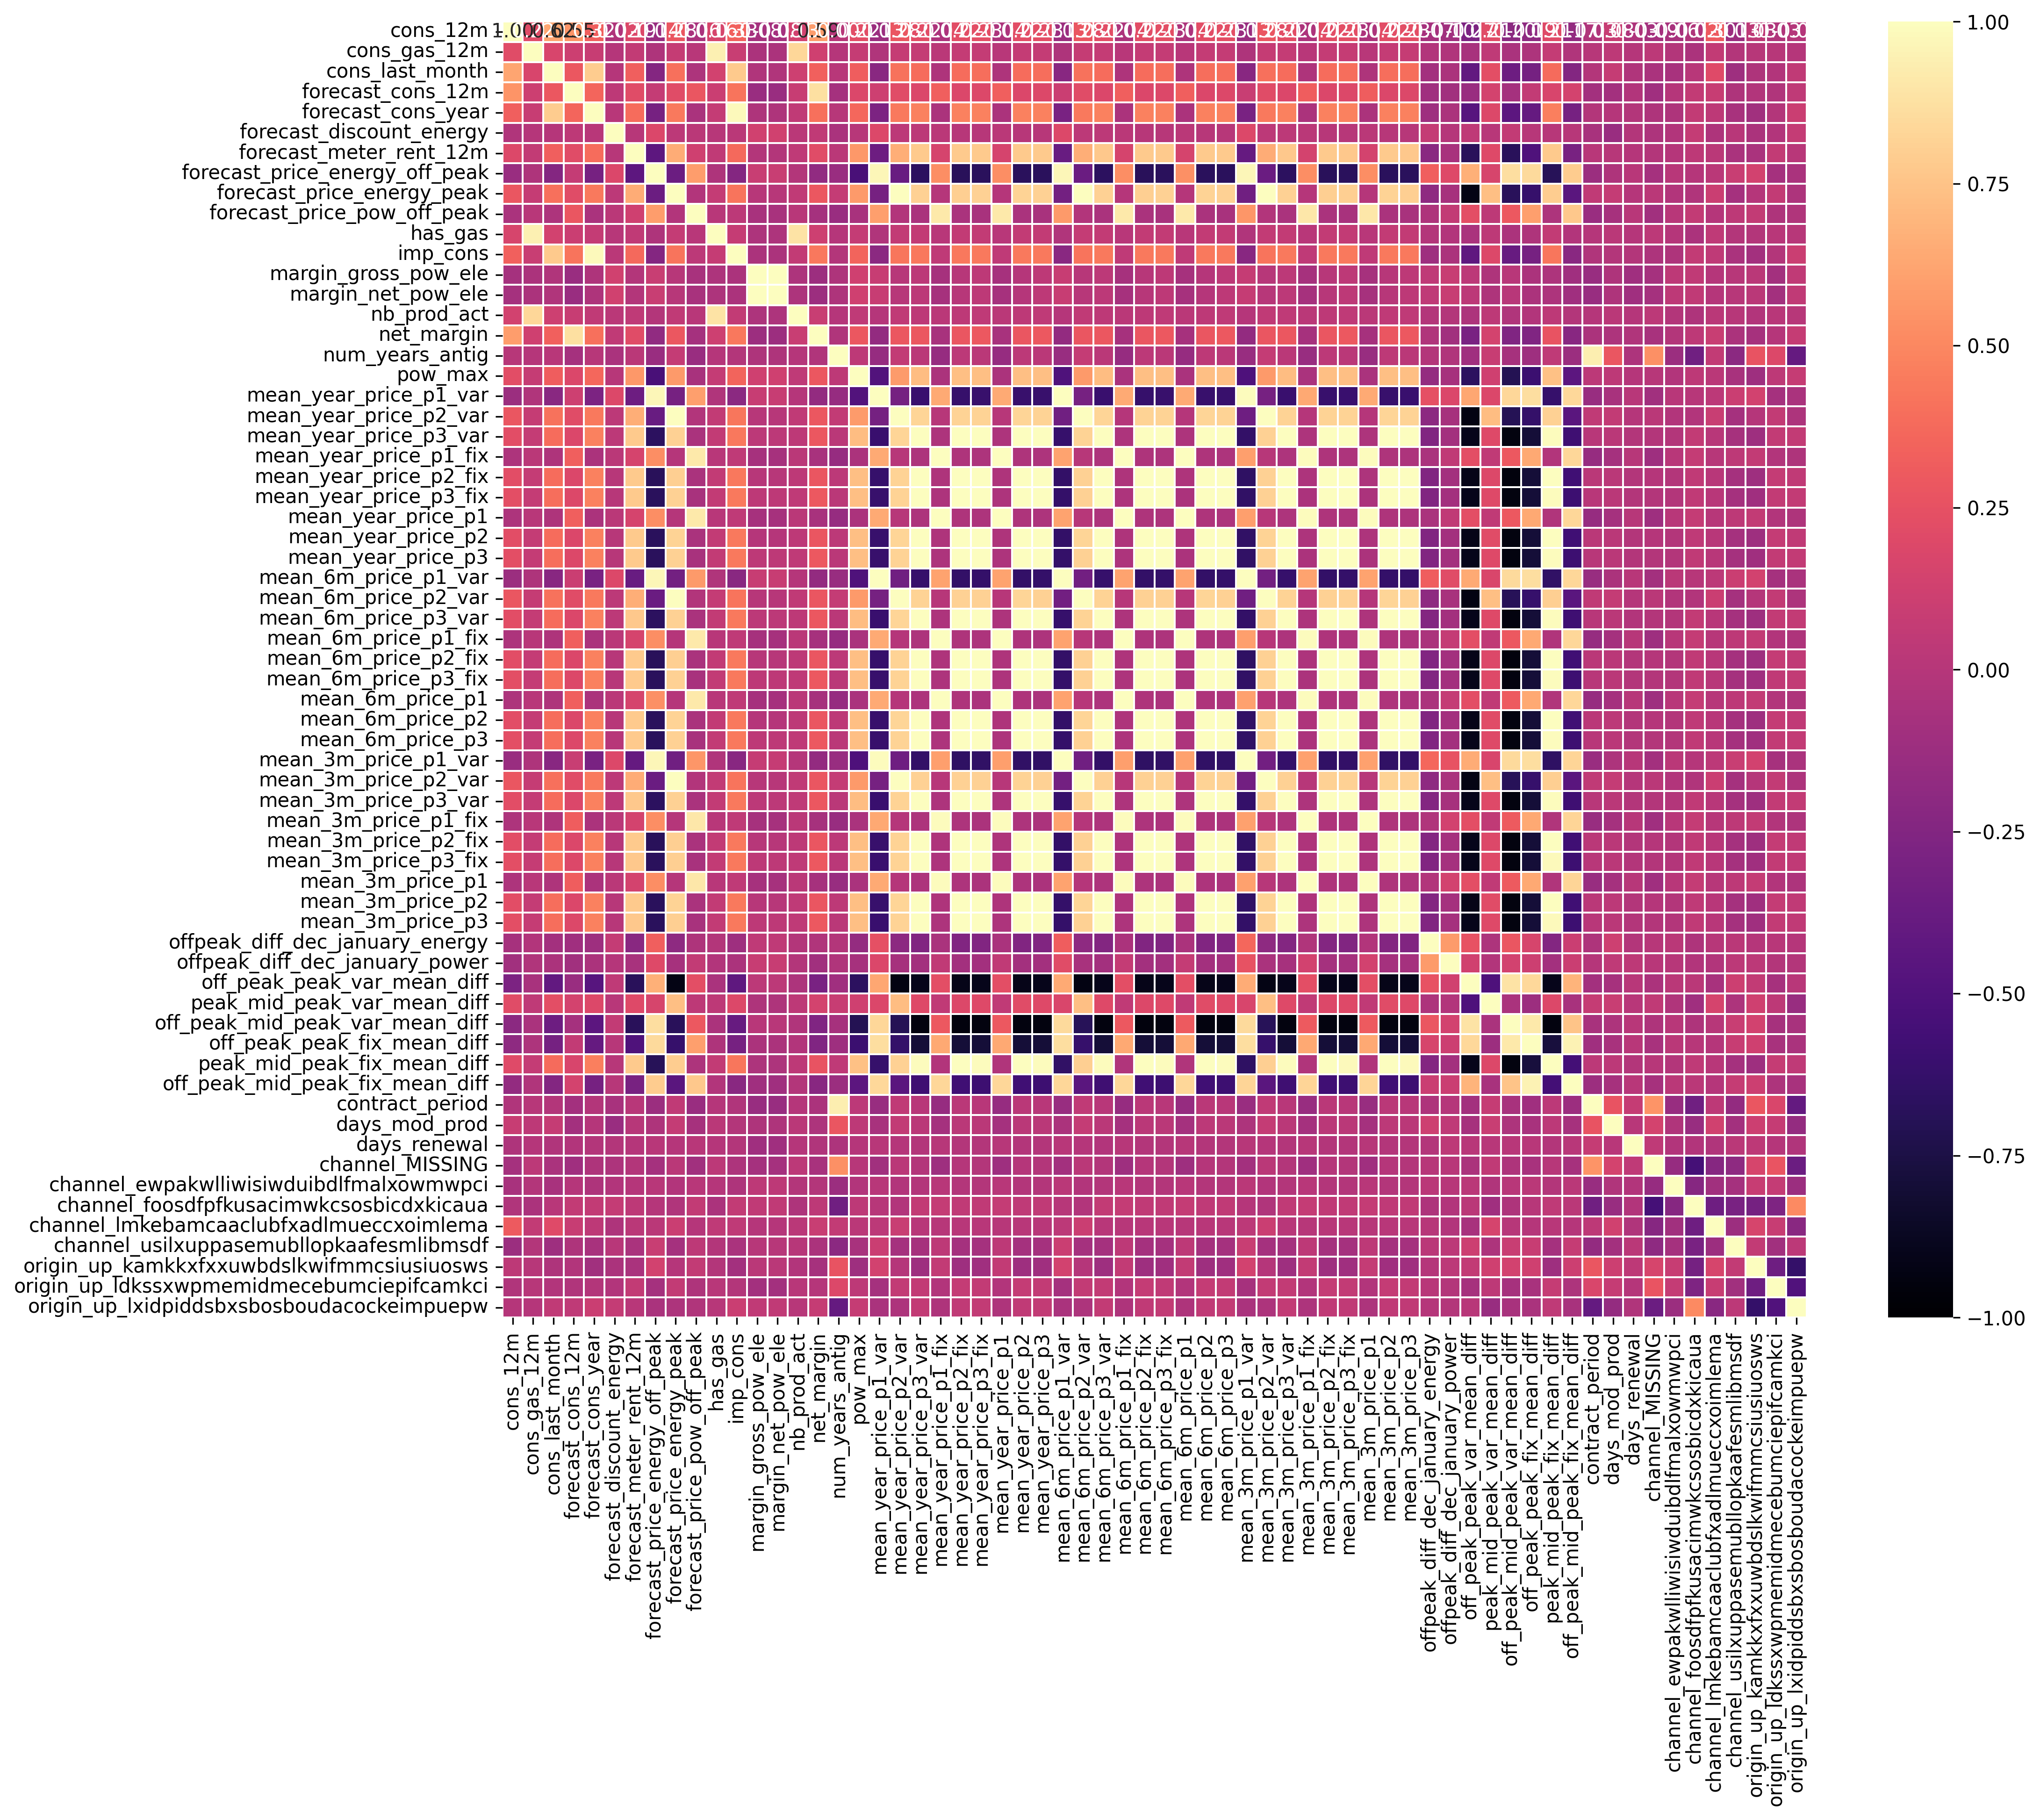

In [46]:
corr_matrix = x.corr()
plt.figure(figsize=(15, 12),dpi=300)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma", vmax=1, vmin=-1, linewidths=.5)
plt.show()

In [47]:
cols_to_remove = x[['mean_year_price_p1','mean_year_price_p2','mean_year_price_p3',
                  'mean_6m_price_p1','mean_6m_price_p2','mean_6m_price_p3',
                  'mean_3m_price_p1','mean_3m_price_p2','mean_3m_price_p3']]

x = x.drop(columns=cols_to_remove,axis=1)

## Model building

In [48]:
#scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_x,y,train_size=0.70,stratify=y,random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8904, 55), (3816, 55), (8904,), (3816,))

In [50]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [51]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
predicted_values_tr = classifier.predict(x_train)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8064
           1       1.00      1.00      1.00       840

    accuracy                           1.00      8904
   macro avg       1.00      1.00      1.00      8904
weighted avg       1.00      1.00      1.00      8904



In [54]:
predicted_values_ts = classifier.predict(x_test)
print(classification_report(y_test,predicted_values_ts))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3456
           1       0.64      0.04      0.08       360

    accuracy                           0.91      3816
   macro avg       0.77      0.52      0.52      3816
weighted avg       0.88      0.91      0.87      3816



In [73]:
##Lets create confusion matrix for better understanding

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted_values_ts)
cf

array([[3447,    9],
       [ 344,   16]], dtype=int64)

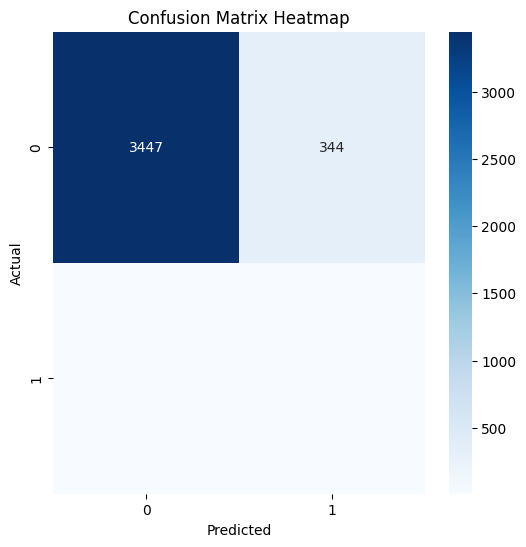

In [72]:
plt.figure(figsize=(6,6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

- From the above analysis we can see that the Recall anf F1 score are very low for class '0', this is because of the class imbalance we have in our traget variable.

- The model predicted 3451 true negatives which is a good indication, but we cannot entiry relay on accuracy score.

- The false positives and false negative may include cost to the business, so we need to consider the importance of recall and F1 score.

### Hyper parameter tuning for Random forest

In [57]:
from sklearn.metrics import f1_score

def calc_score(model,x1,y1,x2,y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1,f2

In [58]:
def effect(train_score,test_score,x_axis,Title):
    plt.figure(figsize = (7,4),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(Title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1_score")
    plt.show()

### N_estimators

In [59]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
                n_estimators = i,
                n_jobs= -1,
                max_depth = 7,
                random_state = 101)
    
    f1, f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

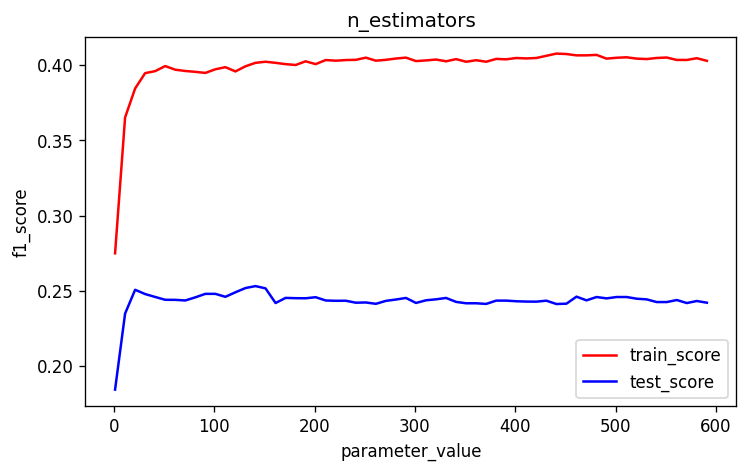

In [60]:
effect(train, test, range(1,600,10), 'n_estimators')

### max_samples

In [61]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:
    model = RFC(class_weight = 'balanced_subsample',n_estimators=20,
                n_jobs = -1,
                max_depth = 7,
                random_state = 101,
                max_samples = i)
    
    f1, f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

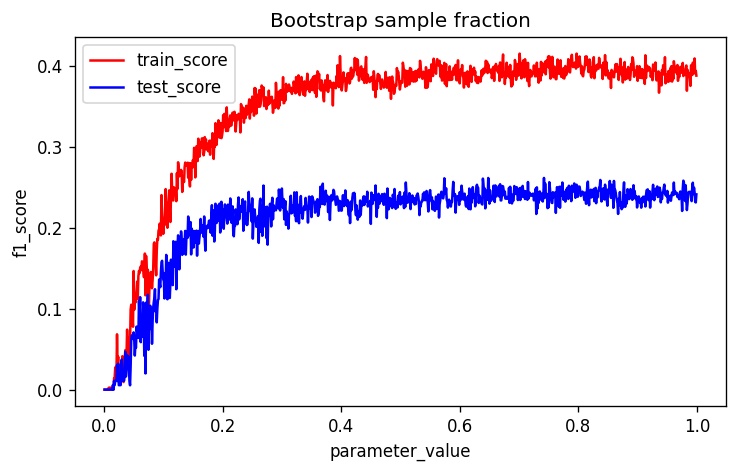

In [62]:
effect(train,test,maxsamples, 'Bootstrap sample fraction')

In [63]:
maxfeatures = range(1,x.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample',
                n_estimators = 20,
                n_jobs = -1,
                max_depth = 7,
                random_state = 101,
                max_features = i,
                max_samples = 0.2)
    
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

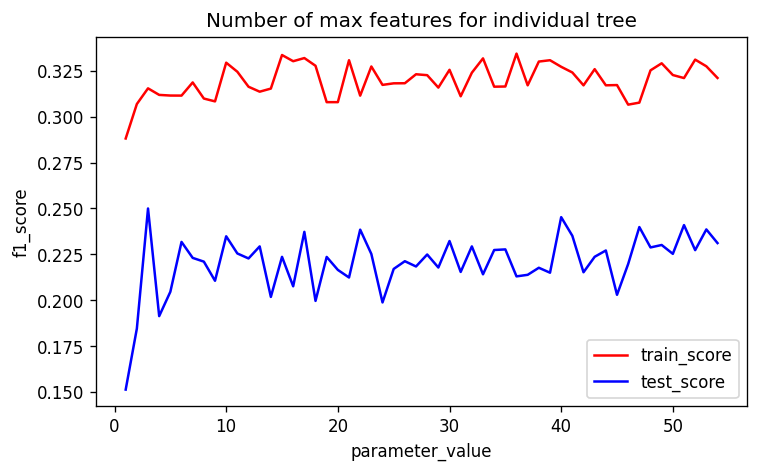

In [64]:
effect(train,test,maxfeatures,'Number of max features for individual tree')

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = { 
    'n_estimators': [10,20,30], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3,6,9], 
    'max_leaf_nodes': [3,6,9],
    'max_samples':[None,0.2]
} 

In [67]:
grid_search = GridSearchCV(RFC(),param_grid=param_grid) 
grid_search.fit(x_train, y_train) 


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'max_samples': [None, 0.2],
                         'n_estimators': [10, 20, 30]})

In [68]:
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=10)


In [75]:
model_grid = RFC(max_depth=6,max_features=None,max_leaf_nodes=9,n_estimators=10) 
model_grid.fit(x_train, y_train) 
y_pred_grid = model.predict(x_test) 
print(classification_report(y_test,y_pred_grid)) 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3456
           1       0.22      0.24      0.23       360

    accuracy                           0.85      3816
   macro avg       0.57      0.58      0.57      3816
weighted avg       0.85      0.85      0.85      3816



In [76]:
cf2 = confusion_matrix(y_test,y_pred_grid)
cf2

array([[3158,  298],
       [ 274,   86]], dtype=int64)

- The model still needs some feature enggineering because the false negatives has been decreased but the false postives have increased which is not a good sign.

- The Precision score have been decreased because of the big change in the false positive.